In [48]:
import scipy.optimize as op
import numpy as np
import matplotlib.pyplot as plt

def montrer_les_rho(nu_tilde) :
    
    plt.plot ( lam_discr_tilde , nu_tilde , label = "$\\tilde{\\nu}$")

    ## 1 
    Mat_F_1 = np.eye(lam_discr_tilde.shape[0]  ) - 1/(2*np.pi) * dlam/gbar * np.dot ( np.diag ( nu_tilde ) , K_mat_tilde )
    B = 1/(2*np.pi) *  nu_tilde 
    rho_tilde_1 = np.linalg.solve(Mat_F_1, B)
    rho_s_tilde_1 = rho_tilde_1/nu_tilde 

    ## 2 
    Mat_F_1 = np.eye(lam_discr_tilde.shape[0]  ) - 1/(2*np.pi) * dlam/gbar * np.dot ( K_mat_tilde , np.diag ( nu_tilde )  )
    B = 1/(2*np.pi) *  np.full ( lam_discr_tilde.shape[0] , 1  )
    rho_s_tilde_2 = np.linalg.solve(Mat_F_1, B)
    rho_tilde_2 = nu_tilde*rho_s_tilde_2

    plt.plot ( lam_discr_tilde , rho_s_tilde_1 , label = 'Meth 1 : $\\tilde{\\rho_s}$ ')
    plt.plot ( lam_discr_tilde , rho_tilde_1  , label = 'Meth 1 : $\\tilde{\\rho}$')
    plt.plot ( lam_discr_tilde , rho_s_tilde_2 , label = 'Meth 2 : $\\tilde{\\rho_s}$ ')
    plt.plot ( lam_discr_tilde , rho_tilde_2  , label = 'Meth 2 : $\\tilde{\\rho}$')

    plt.legend()
    plt.xlabel("$\\tilde{\\theta}$")
    plt.show()

    plt.plot ( lam_discr_tilde , rho_s_tilde_1 -  rho_s_tilde_2  , label = '$ \\Delta \\tilde{\\rho_s}$ ')
    plt.plot ( lam_discr_tilde , rho_tilde_1  -  rho_tilde_2    , label = '$\\Delta \\tilde{\\rho}$')

    plt.legend()
    plt.xlabel("$\\tilde{\\theta}$")
    plt.show()

#

Triples key possibles: dict_keys([(56.064, 325.088, 18.339, 22.176)])


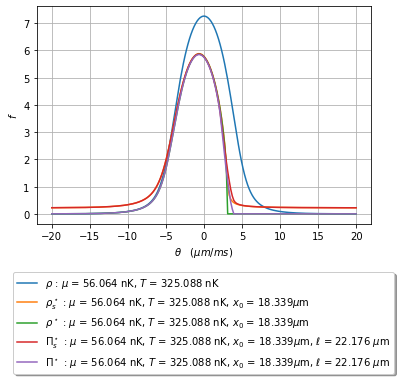

filename = 2024-02-09/theta_discr_ih2.npz
filename = 2024-02-09/density_expansion_nu_theta_edge_1.0_ih2_56.064_325.088_18.339_22.176_30.000.npz
filename = 2024-02-09/density_expansion_nu_theta_edge_1.0_ih2_56.064_325.088_18.339_22.176_30.000.npz
filename = 2024-02-09/rho_theta_edge_1.0_discr_ih2_56.064_325.088_18.339.npz
filename = 2024-02-09/rho_theta_edge_1.0_discr_moy_ih2_56.064_325.088_18.339_22.176.npz


/tmp/ipykernel_96542/2203293745.py:201: RuntimeWarning: divide by zero encountered in divide
  chi_square = np.sum(((observed_y - interpolated_simulated_y)**2 / interpolated_simulated_y)[mask])


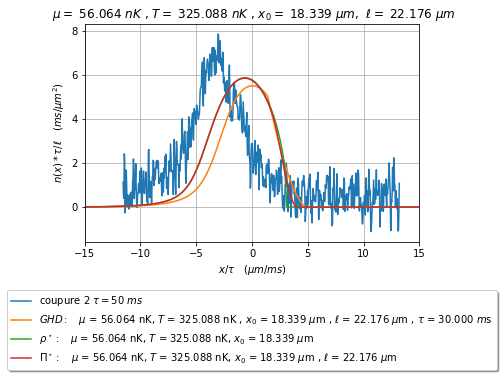

ICI


TypeError: '>' not supported between instances of 'float' and 'NoneType'

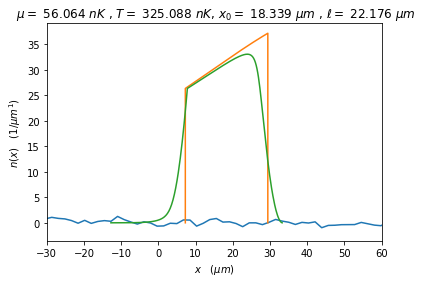

In [51]:
import os
import re
import numpy as np
import matplotlib.pyplot as plt

def extract_triples(date, nom, mup=None, T=None, x0=None ,Taille=None):
    triples = {}  # Utiliser un ensemble pour éviter les doublons
    
    # Parcourir les fichiers dans le répertoire spécifié par date
    for filename in os.listdir(date):
        # Vérifier si le nom du fichier correspond au format attendu
        if nom ==  "theta_edge_1.0_ih1" :
            match = re.match(rf"density_expansion_nu_{re.escape(nom)}_([\d.]+)_([\d.]+)\_veff_bord.npz", filename)
            if match:
                file_mup = float(match.group(1))
                file_T = float(match.group(2))
                # Vérifier si les valeurs correspondent aux critères spécifiés
                if (mup is None or mup == file_mup) and (T is None or T == file_T):
                    triples[(file_mup, file_T)] = extract_t_times_Taille(date, nom, (file_mup, file_T))
        elif nom == "theta_edge_1.0_ih2" :
            match = re.match(rf"density_expansion_nu_{re.escape(nom)}_([\d.]+)_([\d.]+)_([\d.]+)_([\d.]+)_([\d.]+)\.npz", filename)
            if match:
                file_mup = float(match.group(1))
                file_T = float(match.group(2))
                file_x0 = float(match.group(3))
                file_Taille = float(match.group(4))
                # Vérifier si les valeurs correspondent aux critères spécifiés
                if (mup is None or mup == file_mup) and (T is None or T == file_T) and (x0 is None or x0 == file_x0) and (Taille is None or Taille == file_Taille):
                    triples[(file_mup, file_T,file_x0, file_Taille)] = extract_t_times_Taille(date, nom, (file_mup, file_T,file_x0, file_Taille))
    
    return triples

def extract_t_times_Taille(date, nom, triple):
    
    t_times_Taille_values = set()  # Utiliser un ensemble pour éviter les doublons
    
    # Construire le motif de recherche pour le nom de fichier
    if nom ==  "theta_edge_1.0_ih1" :
        mup, T = triple
        pattern = rf"density_expansion_nu_{re.escape(nom)}_{mup:.3f}_{T:.3f}_([\d.]+)\.npz"
       
    elif nom ==  "theta_edge_1.0_ih2" :
        mup, T, x0, Taille = triple
        pattern = rf"density_expansion_nu_{re.escape(nom)}_{mup:.3f}_{T:.3f}_{x0:.3f}_{Taille:.3f}_([\d.]+)\.npz"
    # Parcourir les fichiers dans le répertoire spécifié par date
    for filename in os.listdir(date):
        # Vérifier si le nom du fichier correspond au format attendu
        match = re.match(pattern, filename)
        if match:
            t_times_Taille = float(match.group(1))
            t_times_Taille_values.add(t_times_Taille)
    
    return sorted(t_times_Taille_values)



def compare_condition(value, condition):
    """
    Fonction utilitaire pour comparer une valeur avec une condition.
    La condition peut être:
    - Une liste de valeurs : check si value est dans la liste
    - Une fonction lambda ou un string avec des opérateurs (">", "<", etc.)
    """
    if isinstance(condition, list):
        return value in condition
    elif callable(condition):
        return condition(value)
    elif isinstance(condition, str):
        # On supporte les conditions sous forme de string (ex: '>' ou '<')
        if condition == ">":
            return value > 0
        elif condition == "<":
            return value < 0
        elif condition == "=":
            return value == 0
    return False  # Par défaut, ne pas accepter

def extract_triples_2(date, nom, mup=None, T=None, Taille=None,
                    condition_mup=None, condition_T=None, condition_Taille=None):
    """
    Extrait les triples de fichiers en fonction des conditions données.
    Conditions peuvent être une valeur, une liste de valeurs ou une fonction de comparaison.
    """
    triples = {}
    
    # Parcourir les fichiers dans le répertoire spécifié par date
    for filename in os.listdir(date):
        # Vérifier si le nom du fichier correspond au format attendu
        match = re.match(rf"density_expansion_nu_{re.escape(nom)}_([\d.]+)_([\d.]+)_([\d.]+)_([\d.]+)\.npz", filename)
        if match:
            file_mup = float(match.group(1))
            file_T = float(match.group(2))
            file_Taille = float(match.group(3))
            
            # Vérifier les conditions
            if (condition_mup is None or compare_condition(file_mup, condition_mup)) and \
               (condition_T is None or compare_condition(file_T, condition_T)) and \
               (condition_Taille is None or compare_condition(file_Taille, condition_Taille)):
                triples[(file_mup, file_T, file_Taille)] = extract_t_times_Taille(date, nom, (file_mup, file_T, file_Taille))   
    
    return triples

def save_figure(fig, directory_path, file_name):
    """
    Enregistre la figure dans le répertoire spécifié avec le nom de fichier spécifié.

    Args:
        fig (matplotlib.figure.Figure): La figure à enregistrer.
        directory_path (str): Le chemin du répertoire où enregistrer la figure.
        file_name (str): Le nom du fichier à utiliser pour enregistrer la figure.
    """
    # Assurez-vous que le répertoire existe
    os.makedirs(directory_path, exist_ok=True)
    
    # Concaténer le chemin du répertoire avec le nom du fichier
    file_path = os.path.join(directory_path, file_name)
    
    # Enregistrer la figure dans le fichier spécifié
    fig.savefig(file_path)
    
    # Afficher un message de confirmation
    print(f"La figure a été enregistrée dans {file_path}")


def plot_graph1(date, nom, triple, time_list):
    mu, T, x0 , Taille = triple

    # Charger les données
    index_last_underscore = nom.rfind('_')  # Trouver l'index du dernier underscore

    theta_discr = np.load(f"{date}/theta_discr_{nom[index_last_underscore+1:]}.npz")
    nu_discr = np.load(f"{date}/nu_discr_{nom[index_last_underscore+1:]}_{mu:.3f}_{T:.3f}.npz")
    rho_s_discr = np.load(f"{date}/rho_s_discr_{nom[index_last_underscore+1:]}_{mu:.3f}_{T:.3f}.npz")
    rho_discr = np.load(f"{date}/rho_discr_{nom[index_last_underscore+1:]}_{mu:.3f}_{T:.3f}.npz")
    theta_star = np.load(f"{date}/{nom}_{mu:.3f}_{T:.3f}_{x0:.3f}.npz")
    
    nu_theta_star_discr = np.load(f"{date}/nu_{nom[:index_last_underscore]}_discr_{nom[index_last_underscore+1:]}_{mu:.3f}_{T:.3f}_{x0:.3f}.npz")
    rho_s_theta_star_discr = np.load(f"{date}/rho_s_{nom[:index_last_underscore]}_discr_{nom[index_last_underscore+1:]}_{mu:.3f}_{T:.3f}_{x0:.3f}.npz")
    rho_theta_star_discr = np.load(f"{date}/rho_{nom[:index_last_underscore]}_discr_{nom[index_last_underscore+1:]}_{mu:.3f}_{T:.3f}_{x0:.3f}.npz")
    
    nu_theta_discr_moy = np.load(f"{date}/nu_{nom[:index_last_underscore]}_discr_moy_{nom[index_last_underscore+1:]}_{mu:.3f}_{T:.3f}_{x0:.3f}_{Taille:.3f}.npz")
    rho_s_theta_discr_moy = np.load(f"{date}/rho_s_{nom[:index_last_underscore]}_discr_moy_{nom[index_last_underscore+1:]}_{mu:.3f}_{T:.3f}_{x0:.3f}_{Taille:.3f}.npz")
    rho_theta_discr_moy = np.load(f"{date}/rho_{nom[:index_last_underscore]}_discr_moy_{nom[index_last_underscore+1:]}_{mu:.3f}_{T:.3f}_{x0:.3f}_{Taille:.3f}.npz")
    #print ( 'theta star = ' , theta_star)

    # Tracer les graphiques
    #plt.plot(theta_discr, nu_discr, label='$\\nu$ : $\\mu$ = {:.3f} nK, $T$ = {:.3f} nK'.format(mu, T))
    plt.plot(theta_discr, rho_discr, label='$\\rho$ : $\\mu$ = {:.3f} nK, $T$ = {:.3f} nK'.format(mu, T))
   # plt.plot(theta_discr, nu_theta_star_discr, label='$\\nu_\\star$ : $\\mu$ = {:.3f} nK, $T$ = {:.3f} nK, $x_0$ = {:.3f}$\\mu$m'.format(mu, T, x0))
    plt.plot(theta_discr, rho_s_theta_star_discr, label='$\\rho_s^\\star$ : $\\mu$ = {:.3f} nK, $T$ = {:.3f} nK, $x_0$ = {:.3f}$\\mu$m'.format(mu, T, x0))
    plt.plot(theta_discr, rho_theta_star_discr, label='$\\rho^\\star$ : $\\mu$ = {:.3f} nK, $T$ = {:.3f} nK, $x_0$ = {:.3f}$\\mu$m'.format(mu, T, x0))
    #plt.plot(theta_discr, nu_theta_discr_moy, label='$\\nu_\\star$ : $\\mu$ = {:.3f} nK, $T$ = {:.3f} nK, $x_0$ = {:.3f}$\\mu$m, $\\ell$ = {:.3f} $\\mu$m'.format(mu, T, x0, Taille))
    plt.plot(theta_discr, rho_s_theta_discr_moy, label='$\\Pi_s^\\star$ : $\\mu$ = {:.3f} nK, $T$ = {:.3f} nK, $x_0$ = {:.3f}$\\mu$m, $\\ell$ = {:.3f} $\\mu$m'.format(mu, T, x0, Taille))
    plt.plot(theta_discr, rho_theta_discr_moy, label='$\\Pi^\\star$ : $\\mu$ = {:.3f} nK, $T$ = {:.3f} nK, $x_0$ = {:.3f}$\\mu$m, $\\ell$ = {:.3f} $\\mu$m'.format(mu, T, x0, Taille))
    plt.xlabel('$\\theta\quad (\\mu m/ ms ) $')
    plt.ylabel('$f$')
    #plt.title(f"$\\mu$ = {mu:.3f} nK, $T$ = {T:.3f} nK")
 
import numpy as np

def calculate_chi_square(observed_x, observed_y, simulated_x, simulated_y):
    """
    Calcule le chi-square entre les données observées et les valeurs simulées en effectuant une interpolation linéaire.
    
    Args:
        observed_x (array-like): Les abscisses des données observées.
        observed_y (array-like): Les ordonnées des données observées.
        simulated_x (array-like): Les abscisses des valeurs simulées.
        simulated_y (array-like): Les ordonnées des valeurs simulées.
        
    Returns:
        float: La valeur du chi-square.
    """
    observed_x = np.array(observed_x)
    observed_y = np.array(observed_y)
    from scipy.signal import savgol_filter
    observed_y = np.array(savgol_filter(observed_y, 2, 1))
    simulated_x = np.array(simulated_x)
    simulated_y = np.array(simulated_y)
    
    #print('len(observed_x)' , len(observed_x))
    if len(observed_x) == 0 : return None
    
    # Interpoler les valeurs simulées aux abscisses des données observées
    interpolated_simulated_y = np.interp(observed_x, simulated_x, simulated_y)
    #print ('jj' , interpolated_simulated_y)
    flag_plot = (1==0) 
    #print ("flag_plot : " , flag_plot)
    if flag_plot :
    
        plt.plot(simulated_x ,simulated_y , label ='sul')
        plt.plot(observed_x , observed_y, label = 'data' )
        plt.plot(observed_x , interpolated_simulated_y, label = 'data s' )
        plt.title('interpolation')
        plt.legend()
        plt.show()
    
    # Calculer le chi-square
    # Calculer le chi-square en excluant les zéros
    mask = interpolated_simulated_y != 0
    chi_square = np.sum(((observed_y - interpolated_simulated_y)**2 / interpolated_simulated_y)[mask])
    
    return chi_square


import numpy as np

def dupliquer_donnees(input_filename, nom_donnee, output_filename):
    # Charger les données à partir du fichier npz
    donnees = np.load(input_filename)
    
    # Extraire les données du fichier
    donnees_a_dupliquer = donnees[nom_donnee]
    
    # Dupliquer les données
    donnees_dupliquees = np.concatenate((donnees_a_dupliquer, donnees_a_dupliquer))
    
    # Enregistrer les données dupliquées dans un nouveau fichier npz
    np.savez(output_filename, **{nom_donnee: donnees_dupliquees})




def plot_graph2(date, nom, triple, time_list , DONNEES  , id_donnes = -1):
    mu, T, x00, Taille = triple
    # Charger les données
    index_last_underscore = nom.rfind('_')  # Trouver l'index du dernier underscore
    # Créer un graphique pour la densité multipliée par le temps en fonction de la position/temps
    
    filename = f"{date}/theta_discr_{nom[index_last_underscore+1:]}.npz"
    print ( 'filename =' ,filename )
    theta_discr = np.load(filename)
    ax1.set(xlabel="$x/\\tau\quad (\mu m / ms ) $", ylabel="$n(x)*\\tau/\ell\quad ( ms/\mu m^2 ) $", title=f" $\\mu = $ {mu:.3f} $nK$ , $T =$ {T:.3f} $nK$ , $x_0 =$ {x00:.3f} $\mu m$,  $\\ell =$ {Taille:.3f} $\mu m$")
    
    if date_donnees == '2024-02-09': t  = 50
    elif date_donnees == '2024-02-29':t = 50
    elif date_donnees == '2024-04-24':t = 30
    else : t = time_list[-1] 
    
    if DONNEES != None :
        for Donnees in [DONNEES[id_donnes]] :        
            X , Y , label = Donnees
            if date_donnees == '2024-02-09':x0 = 76.25 - 6.82
            elif date_donnees == '2024-02-29':x0 = - 6
            elif date_donnees == '2024-04-24':x0 = 0 
            else :x0 = X[np.argmax(Y)]
            X = X-x0
            ax1.plot(X/t, Y*t/Taille, label=label)
    #print ( 'mu , T , Taille = ' , mu, T, Taille)
    #print ( 'time_list , ' , time_list)
    for t in time_list:
        filename = f"{date}/density_expansion_nu_{nom}_{mu:.3f}_{T:.3f}_{x00:.3f}_{Taille:.3f}_{t:.3f}.npz"
        print ( 'filename =' ,filename )
        data_s = np.load(filename) 
        x0 = data_s[0,np.argmax(data_s[1, :])]
        x0 =0
        X_simul = data_s[0, :] - x0
        #print ( data_s , data_s.size )
        ax1.plot(X_simul/t*Taille, data_s[1, :]*t/Taille, label=f"$GHD : \\quad \\mu$ = {mu:.3f} nK, $T$ = {T:.3f} nK , $x_0$ = {x00:.3f} $\\mu$m , $\\ell$ = {Taille:.3f} $\\mu$m , $\\tau$ = {t:.3f} $m$s")
    
    ta = time_list[0]
    filename = f"{date}/density_expansion_nu_{nom}_{mu:.3f}_{T:.3f}_{x00:.3f}_{Taille:.3f}_{ta:.3f}.npz"
    print ( 'filename =' ,filename )
    data_s = np.load(filename) 
    x0 = data_s[0,np.argmax(data_s[1, :])]
    x0 =0
    X_simul = data_s[0, :] - x0
    
    np.savez(f"PourIsa/donne.npz", [X/t , Y*t/Taille])
    np.savez(f"PourIsa/simul_mu-{mu:.3f}_T-{T:.3f}_Taille-{Taille:.3f}_.npz", [X_simul/ta*Taille , data_s[1, :]*t/Taille])
    
    index_last_underscore = nom.rfind('_')  # Trouver l'index du dernier underscore
    filename = f"{date}/rho_{nom[:index_last_underscore]}_discr_{nom[index_last_underscore+1:]}_{mu:.3f}_{T:.3f}_{x00:.3f}.npz"
    print ( 'filename =' ,filename )
    rho_theta_star_discr = np.load(filename)
    filename = f"{date}/rho_{nom[:index_last_underscore]}_discr_moy_{nom[index_last_underscore+1:]}_{mu:.3f}_{T:.3f}_{x00:.3f}_{Taille:.3f}.npz"
    print ( 'filename =' ,filename )
    rho_theta_discr_moy = np.load(filename)
    theta0 = theta_discr[np.argmax(rho_theta_star_discr)]
    theta0 =  0 
    ax1.plot(theta_discr-theta0, rho_theta_star_discr, label=f"$\\rho^\\star : \\quad \\mu$ = {mu:.3f} nK, $T$ = {T:.3f} nK, $x_0$ = {x00:.3f} $\\mu$m")
    ax1.plot(theta_discr-theta0, rho_theta_discr_moy, label=f"$\\Pi^\\star : \\quad \\mu$ = {mu:.3f} nK, $T$ = {T:.3f} nK, $x_0$ = {x00:.3f} $\\mu$m , $\\ell$ = {Taille:.3f} $\\mu$m")
    
    if DONNEES != None : 
        mask = (X>-2000)*(X<2500)
        #print ( ' mask :' , mask )
        if id_donnes == -1 : return calculate_chi_square(X[mask]/t, Y[mask]*t/Taille, X_simul/t*Taille , data_s[1, :]*t/Taille)
        if id_donnes == 1 : 
            print ( id_donnes)
            return calculate_chi_square(X[mask]/t, Y[mask], X_simul, data_s[1, :])
    return 0

def plot_graph3(date, nom, triple, time_list , DONNEES):
    index_last_underscore = nom.rfind('_')  # Trouver l'index du dernier underscore
    mu, T, x00, Taille = triple
    theta_discr = np.load(f"{date}/theta_discr_{nom[index_last_underscore+1:]}.npz")
    ax1.set(xlabel="$x \quad (\mu m)  $", ylabel="$n(x) \quad ( 1/\mu m^1 ) $", title=f" $\\mu = $ {mu:.3f} $nK$ , $T =$ {T:.3f} $nK$, $x_0 =$ {x00:.3f} $\mu m$ , $\\ell =$ {Taille:.3f} $\mu m$")
    
    if DONNEES != None :
        for Donnees in DONNEES[-2:-1] :        
            X , Y , label = Donnees
            if date_donnees == '2024-02-09':x0 = 76.25 - 6.82
            elif date_donnees == '2024-02-29':x0 = - 6
            elif date_donnees == '2024-04-24':x0 = 0    
            else :x0 = X[np.argmax(Y)]            
            ax1.plot((X-x0), Y, label=label)
    for t in time_list:
        filename = f"{date}/density_expansion_nu_{nom}_{mu:.3f}_{T:.3f}_{x00:.3f}_{Taille:.3f}_{t:.3f}.npz"
        data_s = np.load(filename) 
        #np.savez(f"density_expansion_nu_{nom}_{mu:.3f}_{T:.3f}_{Taille:.3f}_{t:.3f}.npz", data_s)
        x0 = data_s[0,np.argmax(data_s[1, :])]
        #print ( "data_s : ", data_s)
        x0=0
        X_simul = data_s[0, :] - x0
        if t > -1 and 1 == 0 : 
            if date_donnees == '2024-02-09': t2  = 50
            elif date_donnees == '2024-02-29':t2 = 50
            elif date_donnees == '2024-04-24':t2 = 30
            else : t2 = time_list[-1] 
            ax1.plot(X_simul*Taille/t*t2, data_s[1, :]*t/t2, label=f"$\\rho$ , $n$ , $\\mu$ = {mu:.3f} nK, $T$ = {T:.3f} nK,  $x_0 =$ {x00:.3f} $\mu m$ ,  $\\ell$ = {Taille:.3f} $\\mu$m , $\\tau$ = {t:.3f} $m$s")
        else : ax1.plot(X_simul*Taille, data_s[1, :], label=f"GHD : $\\mu$ = {mu:.3f} nK, $T$ = {T:.3f} nK, $x_0 =$ {x00:.3f} $\mu m$ , $\\ell$ = {Taille:.3f} $\\mu$m , $\\tau$ = {t:.3f} $m$s")
        
    index_last_underscore = nom.rfind('_')  # Trouver l'index du dernier underscore
    rho_theta_star_discr = np.load(f"{date}/rho_{nom[:index_last_underscore]}_discr_{nom[index_last_underscore+1:]}_{mu:.3f}_{T:.3f}_{x00:.3f}.npz")
    theta0 = theta_discr[np.argmax(rho_theta_star_discr)]
    theta0 = 0 
    #ax1.plot((theta_discr - theta0)*t2, rho_theta_star_discr, label=f"$\\rho^\\star \\quad \\mu$ = {mu:.3f} nK, $T$ = {T:.3f} nK, $\\ell$ = {Taille:.3f} $\\mu$m")


import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy.integrate import quad

def integrale(x, y):
    # Interpolation des données
    from scipy.signal import savgol_filter
    window_size = 3  # Taille de la fenêtre
    poly_order = 2   # Degré du polynôme
    y_smooth = savgol_filter(y, window_length=window_size, polyorder=poly_order)
    f_interp = interp1d(x, np.where(y_smooth>0 , y_smooth , 0 ) , kind='linear')

    # Définir la fonction à intégrer
    def f(x):
        return f_interp(x)

    # Intégration sur un intervalle fini
    integral_value, _ = quad(f, np.min(x), np.max(x))
    
    plt_flag = 0 
    if plt_flag :
        # Afficher le résultat
        print("Valeur de l'intégrale sur l'intervalle fini:", integral_value)

        # Tracer x par rapport à y
        plt.figure(figsize=(10, 5))
        plt.scatter(x, y, label="y")
    
        # Tracer x par rapport à f(x)
        x_values = np.linspace(np.min(x), np.max(x), 100)
        plt.plot(x_values, f_interp(x_values), label="f(x)")
    
        plt.xlabel("x")
        plt.ylabel("y")
        plt.legend()
        plt.show()
    
    return integral_value
    
def plot_Nat(date, nom, triple, time_list , DONNEES):
    index_last_underscore = nom.rfind('_')  # Trouver l'index du dernier underscore
    mu, T, x00, Taille = triple
    from scipy.signal import savgol_filter
    
    if DONNEES != None :
        Donnees=DONNEES[-2]         
        X , Y , label = Donnees
        mask = (X > -20)*(X < 60)
        Nat_donnees0 = integrale(X[mask], Y[mask])
        Donnees=DONNEES[-1]         
        X , Y , label = Donnees
        mask = (X > -400)*(X < 400)
        Nat_donnees1 = integrale(X[mask], Y[mask])
    NAT = []
    for t in time_list :
        filename = f"{date}/density_expansion_nu_{nom}_{mu:.3f}_{T:.3f}_{x00:.3f}_{Taille:.3f}_{t:.3f}.npz"
        print(filename)
        data_s = np.load(filename) 
        x0 = data_s[0,np.argmax(data_s[1, :])]
        x0 = 0 
        X = (data_s[0, :] - x0)*Taille
        Y = data_s[1, :]
        NAT.append(integrale(X, Y))
        #NAT.append(sum(Y))
        if t == 0 :
            fig2, ax2 = plt.subplots()
            ax2.set(xlabel="$x \quad (\mu m )  $", ylabel="$n(x) \quad ( 1/\mu m^1 ) $", title=f" $\\mu = $ {mu:.3f} $nK$ , $T =$ {T:.3f} $nK$, $x_0 =$ {x00:.3f} $\mu m$ , $\\ell =$ {Taille:.3f} $\mu m$")
            ax2.plot(DONNEES[-2][0] , DONNEES[-2][1] , label = DONNEES[-2][2])
            ax2.plot(X ,Y , label = " simule coupure 2 : $\tau = 0 ms$ ")
            plt.grid(True)
            plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))  # Placer la légende à droite du graphique
            plt.show()
        if t > 29 :
            fig2, ax2 = plt.subplots()
            ax2.set(xlabel="$x \quad (\mu m )  $", ylabel="$n(x) \quad ( 1/\mu m^1 ) $", title=f" $\\mu = $ {mu:.3f} $nK$ , $T =$ {T:.3f} $nK$, $x_0 =$ {x00:.3f} $\mu m$ , $\\ell =$ {Taille:.3f} $\mu m$")
            ax2.plot(DONNEES[-1][0] , DONNEES[-1][1] , label = DONNEES[-1][2])
            ax2.plot(X ,Y , label = " simule coupure 2 : $\tau = 30 ms$ ")
            plt.grid(True)
            plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))  # Placer la légende à droite du graphique
            plt.show()
    fig, ax1 = plt.subplots()
    ax1.set(xlabel="$t \quad (ms)  $", ylabel="$(N/N_{0}-1)*100$", title=f" $\\mu = $ {mu:.3f} $nK$ , $T =$ {T:.3f} $nK$ , $x_0 =$ {x00:.3f} $\mu m$, $\\ell =$ {Taille:.3f} $\mu m$")
    ax1.plot(time_list , (np.array(NAT)/NAT[0]-1)*100 , label = "$N$ : simule , $N_{0}$: pour simul à $\\tau = 0 ms$ ")
    print("la deviation GHD est : ",(NAT[-1]/NAT[0]-1)*100 )
    if DONNEES != None : 
        ax1.plot(time_list , (np.array(NAT)/Nat_donnees0-1)*100 , label = "$N$ : simule , $N_{0}$: donné à $\\tau = 1 ms$ ")
        ax1.plot(time_list , (np.array(NAT)/Nat_donnees1-1)*100 , label = "$N$ : simule , $N_{0}$: donné à $\\tau = 30 ms$ ")
        ax1.plot([1 , 30], (np.array([1 , Nat_donnees1/Nat_donnees0])-1)*100 , label = "$N$ : donnees , $N_{0}$: donné à $\\tau = 1 ms$ ")
        ax1.axhline(y=(NAT[0]/NAT[0]-1)*100, color='r', linestyle='--')
    plt.grid(True)
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), fancybox=True, shadow=True, ncol=1)
    plt.show()
    
def plot_graph4(date, nom, triple, time_list , DONNEES):
    index_last_underscore = nom.rfind('_')  # Trouver l'index du dernier underscore
    mu, T, x00, Taille = triple
    theta_discr = np.load(f"{date}/theta_discr_{nom[index_last_underscore+1:]}.npz")
    ax1.set(xlabel="$x \quad (\mu m)  $", ylabel="$n(x) \quad ( 1/\mu m^1 ) $", title=f" $\\mu = $ {mu:.3f} $nK$ , $T =$ {T:.3f} $nK$, $x_0 =$ {x00:.3f} $\mu m$ , $\\ell =$ {Taille:.3f} $\mu m$")
    
    if DONNEES != None :
        for Donnees in DONNEES[-2:] :        
            X , Y , label = Donnees
            if date_donnees == '2024-02-09':x0 = 76.25 - 6.82
            elif date_donnees == '2024-02-29':x0 = - 6
            elif date_donnees == '2024-04-24': mask , x0 = (X<30)*(X>-10) , 0  
            else :x0 = X[np.argmax(Y)]            
            ax1.plot((X[mask]-x0), Y[mask], label=label)
    for t in time_list:
        filename = f"{date}/density_expansion_nu_{nom}_{mu:.3f}_{T:.3f}_{x00:.3f}_{Taille:.3f}_{t:.3f}.npz"
        data_s = np.load(filename) 
        #np.savez(f"density_expansion_nu_{nom}_{mu:.3f}_{T:.3f}_{Taille:.3f}_{t:.3f}.npz", data_s)
        x0 = data_s[0,np.argmax(data_s[1, :])]
        #print ( "data_s : ", data_s)
        x0=0
        X_simul = data_s[0, :] - x0
        if t > -1 and 1 == 0 : 
            if date_donnees == '2024-02-09': t2  = 50
            elif date_donnees == '2024-02-29':t2 = 50
            elif date_donnees == '2024-04-24':t2 = 30
            else : t2 = time_list[-1] 
            ax1.plot(X_simul*Taille/t*t2, data_s[1, :]*t/t2, label=f"$\\rho$ , $n$ , $\\mu$ = {mu:.3f} nK, $T$ = {T:.3f} nK,  $x_0 =$ {x00:.3f} $\mu m$ ,  $\\ell$ = {Taille:.3f} $\\mu$m , $\\tau$ = {t:.3f} $m$s")
        else : ax1.plot(X_simul*Taille, data_s[1, :], label=f"$\\mu$ = {mu:.3f} nK, $T$ = {T:.3f} nK, $x_0 =$ {x00:.3f} $\mu m$ , $\\ell$ = {Taille:.3f} $\\mu$m , $\\tau$ = {t:.3f} $m$s")
        
    index_last_underscore = nom.rfind('_')  # Trouver l'index du dernier underscore
    rho_theta_star_discr = np.load(f"{date}/rho_{nom[:index_last_underscore]}_discr_{nom[index_last_underscore+1:]}_{mu:.3f}_{T:.3f}_{x00:.3f}.npz")
    theta0 = theta_discr[np.argmax(rho_theta_star_discr)]
    theta0 = 0 
    #ax1.plot((theta_discr - theta0)*t2, rho_theta_star_discr, label=f"$\\rho^\\star \\quad \\mu$ = {mu:.3f} nK, $T$ = {T:.3f} nK, $\\ell$ = {Taille:.3f} $\\mu$m")
    
    
# Exemple d'utilisation
date = "2024-02-11"

nom = "theta_star_julia"
date = "analyse1_2024-02-28"
date = "analyse1_2024-03-06"
date_donnees = '2024-02-09'
date = "2024-02-09"

#date = "analyse2_2024-03-01"
#date = "ultime"
#date = "ultime3parametre"
#date_donnees = '2024-02-29'

#date = "2024-11-12"
#date_donnees = '2024-04-24'

nom = "theta_star_h"
nom = "theta_star_1.0_h"
#nom = "theta_edge_ih2"
#nom = "theta_edge_0.1_ih2"
nom = "theta_edge_1.0_ih2"
#nom = "theta_edge_ih1"

#date_donnees = 'None'


DONNEES = []

if date_donnees == 'None' : DONNEES = None

if date_donnees == '2024-02-05' :
    fichier_x = "Scan43_coupure2_1ms_x.txt"
    fichier_y = "Scan43_coupure2_1ms_n.txt"
    Donnees = [np.loadtxt(f"{date_donnees}/Donnees/{fichier_x}") , np.flip(np.loadtxt(f"{date_donnees}/Donnees/{fichier_y}")) , '2em coupure $\\tau = 1ms$']
    DONNEES.append(Donnees)
    fichier_x = "Scan43_coupure1_10ms_x.txt"
    fichier_y = "Scan43_coupure1_10ms_n.txt"
    Donnees = [np.loadtxt(f"{date_donnees}/Donnees/{fichier_x}") , np.flip(np.loadtxt(f"{date_donnees}/Donnees/{fichier_y}")) , '1er coupure $\\tau = 10 ms$']
    DONNEES.append(Donnees)
    fichier_x = "Scan43_x.txt"
    fichier_y = "Scan43_n.txt"
    Donnees = [np.loadtxt(f"{date_donnees}/Donnees/{fichier_x}") , np.flip(np.loadtxt(f"{date_donnees}/Donnees/{fichier_y}")) , '2em coupure $\\tau = 40 ms$']
    DONNEES.append(Donnees)
    
elif date_donnees == '2024-02-09' :
    fichier_x = "X_Scan704_18ms.txt"
    fichier_y = "Y_Scan704_18ms.txt"
    #Donnees = [-np.loadtxt(f"{date_donnees}/Donnees/{fichier_x}") , np.loadtxt(f"{date_donnees}/Donnees/{fichier_y}") , 'Première coupure expansion $\\tau = 18~ms$']
    #DONNEES.append(Donnees)
    fichier_x = "X_Scan696_1ms.txt"
    fichier_y = "Y_Scan696_1ms.txt"
    #Donnees = [-np.loadtxt(f"{date_donnees}/Donnees/{fichier_x}") , np.loadtxt(f"{date_donnees}/Donnees/{fichier_y}") , 'Seconde coupure sélection $\\tau = 1~ ms$']
    #DONNEES.append(Donnees)
    fichier_x = "X_Scan696_50ms.txt"
    fichier_y = "Y_Scan696_50ms.txt"
    #Donnees = [-np.loadtxt(f"{date_donnees}/Donnees/{fichier_x}") , np.loadtxt(f"{date_donnees}/Donnees/{fichier_y}") , 'Seconde coupure expansion $\\tau =  50~ ms$']
    #DONNEES.append(Donnees)

    fichier_x = "X_coupure1_1ms.txt"
    fichier_y = "Y_coupure1_1ms.txt"
    Donnees = [np.loadtxt(f"{date_donnees}/Donnees/{fichier_x}") , np.loadtxt(f"{date_donnees}/Donnees/{fichier_y}") , 'coupure 1 $\\tau = 1~ms$']
    DONNEES.append(Donnees)
    fichier_x = "X_coupure1_18ms.txt"
    fichier_y = "Y_coupure1_18ms.txt"
    Donnees = [np.loadtxt(f"{date_donnees}/Donnees/{fichier_x}") , np.loadtxt(f"{date_donnees}/Donnees/{fichier_y}") , 'coupure 1 $\\tau = 18~ms$']
    DONNEES.append(Donnees)
    fichier_x = "X_coupure2_1ms.txt"
    fichier_y = "Y_coupure2_1ms.txt"
    Donnees = [np.loadtxt(f"{date_donnees}/Donnees/{fichier_x}") , np.loadtxt(f"{date_donnees}/Donnees/{fichier_y}") , 'coupure 2 $\\tau = 1~ms$']
    DONNEES.append(Donnees)
    fichier_x = "X_coupure2_50ms.txt"
    fichier_y = "Y_coupure2_50ms.txt"
    Donnees = [np.loadtxt(f"{date_donnees}/Donnees/{fichier_x}") , np.loadtxt(f"{date_donnees}/Donnees/{fichier_y}") , 'coupure 2 $\\tau = 50~ms$']
    DONNEES.append(Donnees)
    
elif date_donnees == '2024-02-29' :
    fichier_x = "X_coupure1_1ms.txt"
    fichier_y = "Y_coupure1_1ms.txt"
    Donnees = [-np.loadtxt(f"{date_donnees}/Donnees/{fichier_x}") , np.loadtxt(f"{date_donnees}/Donnees/{fichier_y}") , 'coupure 1 $\\tau = 1~ms$']
    DONNEES.append(Donnees)
    fichier_x = "X_coupure1_28ms.txt"
    fichier_y = "Y_coupure1_28ms.txt"
    Donnees = [-np.loadtxt(f"{date_donnees}/Donnees/{fichier_x}") , np.loadtxt(f"{date_donnees}/Donnees/{fichier_y}") , 'coupure 1 $\\tau = 28~ms$']
    DONNEES.append(Donnees)
    fichier_x = "X_coupure2_1ms.txt"
    fichier_y = "Y_coupure2_1ms.txt"
    Donnees = [-np.loadtxt(f"{date_donnees}/Donnees/{fichier_x}") , np.loadtxt(f"{date_donnees}/Donnees/{fichier_y}") , 'coupure 2 $\\tau = 1~ms$']
    DONNEES.append(Donnees)
    fichier_x = "X_coupure2_50ms.txt"
    fichier_y = "Y_coupure2_50ms.txt"
    Donnees = [-np.loadtxt(f"{date_donnees}/Donnees/{fichier_x}") , np.loadtxt(f"{date_donnees}/Donnees/{fichier_y}") , 'coupure 2 $50~ms$']
    DONNEES.append(Donnees)

elif date_donnees == '2024-04-24' :
    fichier_x = "X_coupure1_1ms.txt"
    fichier_y = "Y_coupure1_1ms.txt"
    Donnees = [np.loadtxt(f"{date_donnees}/Donnees/{fichier_x}") , np.loadtxt(f"{date_donnees}/Donnees/{fichier_y}") , 'deformation bord : $t = 1.000~ms$']
    DONNEES.append(Donnees)
    fichier_x = "X_coupure1_18ms.txt"
    fichier_y = "Y_coupure1_18ms.txt"
    Donnees = [np.loadtxt(f"{date_donnees}/Donnees/{fichier_x}") , np.loadtxt(f"{date_donnees}/Donnees/{fichier_y}") , 'deformation bord : $t = 18.000~ms$']
    DONNEES.append(Donnees)
    fichier_x = "X_coupure2_1ms.txt"
    fichier_y = "Y_coupure2_1ms.txt"
    Donnees = [np.loadtxt(f"{date_donnees}/Donnees/{fichier_x}") , np.loadtxt(f"{date_donnees}/Donnees/{fichier_y}") , 'expansion 1D : $\\tau = 1.000~ms$']
    DONNEES.append(Donnees)
    fichier_x = "X_coupure2_30ms.txt"
    fichier_y = "Y_coupure2_30ms.txt"
    Donnees = [np.loadtxt(f"{date_donnees}/Donnees/{fichier_x}") , np.loadtxt(f"{date_donnees}/Donnees/{fichier_y}") , 'expansion 1D : $\\tau = 30.000~ms$']
    DONNEES.append(Donnees)
        

mup = None
T = None #558.939#None#None
x0 = None
Taille = None #28.07# None#22.176#None#22.14#None#22.825#27.866
#18.857, 27.866

#558.939, 18.339, 22.176
nom = "theta_edge_1.0_ih2"
# Extraction des triples possibles
triples = extract_triples(date, nom, mup, T, x0, Taille)
print("Triples key possibles:", triples.keys())


# Tracé des graphiques pour chaque triple avec les temps max
fig, ax1 = plt.subplots()
for triple , liste_t in triples.items():
    time_list = [max(liste_t)]
    time_list = sorted(list(liste_t))[-10:]
    mask = (np.array(list(liste_t))< 32)*(np.array(list(liste_t))> 29)
    time_list = sorted(np.array(list(liste_t))[mask])
    plot_graph1(date, nom, triple, time_list)
plt.grid(True)
#plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))  # Placer la légende à droite du graphique
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), fancybox=True, shadow=True, ncol=1)
plt.show()

fig, ax1 = plt.subplots()
chi2 = {}
for triple , liste_t in triples.items():
    time_list = [max(liste_t)]
    time_list = sorted(list(liste_t))[-10:]
    mask = (np.array(list(liste_t))< 32)*(np.array(list(liste_t))> 29)
    time_list = sorted(np.array(list(liste_t))[mask])
    if len(time_list) != 0 : chi2[triple] = plot_graph2(date, nom, triple, time_list , DONNEES)
ax1.set_xlim(-15, 15) 
plt.grid(True)
#plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))  # Placer la légende à droite du graphique
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), fancybox=True, shadow=True, ncol=1)
plt.show()
print ( "ICI")
fig, ax1 = plt.subplots()
for triple , liste_t in triples.items():
    time_list = [max(liste_t)]
    time_list = sorted(list(liste_t))[-10:]
    mask = ((np.array(list(liste_t))< 32)*(np.array(list(liste_t))> 29))+(np.array(list(liste_t))==0)
    mask = np.isin(np.array(liste_t), [0, 1]) #+ (np.array(list(liste_t)) == 30)
    time_list = sorted(np.array(list(liste_t))[mask])
    plot_graph3(date, nom, triple, time_list , DONNEES)
plt.xlim([-30 , 60 ])
plt.axvline(x=x0, color='black', linestyle='--', linewidth=1.5, alpha=0.5)
plt.axhline(y=0, color='black', linestyle='--', linewidth=1.5, alpha=0.5)
plt.grid(True)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), fancybox=True, shadow=True, ncol=1)
plt.show()

print ( "les cles :", chi2)


# Trouver la clé avec la valeur minimale
triple = min(chi2, key=chi2.get)

#for triple , liste_t in triples.items():
for triple , liste_t in {triple : extract_t_times_Taille(date, nom, triple)}.items():
    time_list = [max(liste_t)]
    time_list = sorted(list(liste_t))[0:]
    mask = (np.array(list(liste_t))< 2000)*(np.array(list(liste_t))>= 0)
    time_list = sorted(np.array(list(liste_t))[mask])
    print ( "la")
    print ( 'time_list : ' , time_list)
    if len(time_list) != 0 : plot_Nat(date, nom, triple, time_list , DONNEES)
        
# Afficher la clé avec la valeur minimale
print("Clé avec la valeur minimale:", triple)
fig, ax1 = plt.subplots()
liste_t = extract_t_times_Taille(date, nom, triple)
liste_t = triples[triple]
time_list = [max(liste_t)]
time_list = sorted(list(liste_t))[:]
mask = (np.array(list(liste_t))< 32)*(np.array(list(liste_t))> 29)
time_list = sorted(np.array(list(liste_t))[mask])
plot_graph2(date, nom, triple, time_list , DONNEES)
plt.grid(True)
#plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))  # Placer la légende à droite du graphique
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), fancybox=True, shadow=True, ncol=1)
plt.show()

fig, ax1 = plt.subplots()
index_last_underscore = nom.rfind('_')  # Trouver l'index du dernier underscore
theta_discr = np.load(f"{date}/theta_discr_{nom[index_last_underscore+1:]}.npz")
liste_t = extract_t_times_Taille(date, nom, triple)
time_list = [max(liste_t)]
time_list = sorted(list(liste_t))[-1:]
mask = (np.array(list(liste_t))<32)*(np.array(list(liste_t))> 29)
time_list = sorted(np.array(list(liste_t))[mask])
plot_graph3(date, nom, triple, time_list , DONNEES)
plt.grid(True)
#plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))  # Placer la légende à droite du graphique
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), fancybox=True, shadow=True, ncol=1)
plt.xlim([-500 , 500])

plt.show()

fig, ax1 = plt.subplots()
for triple , liste_t in triples.items():
    time_list = [max(liste_t)]
    time_list = sorted(list(liste_t))[-10:]
    mask = ((np.array(list(liste_t))< 32)*(np.array(list(liste_t))> 29))+(np.array(list(liste_t))==0)
    mask = np.isin(np.array(liste_t), [0, 1, 10 , 20 , 30]) #+ (np.array(list(liste_t)) == 30)
    time_list = sorted(np.array(list(liste_t))[mask])
    plot_graph4(date, nom, triple, time_list , DONNEES)
#plt.xlim([])
plt.grid(True)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), fancybox=True, shadow=True, ncol=1)
plt.show()




/tmp/ipykernel_96542/4036969013.py:125: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), fancybox=True, shadow=True, ncol=1)


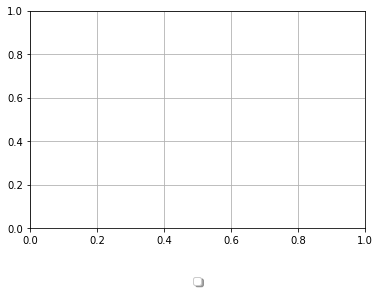

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Fonction porte (sans gaussienne)
def porte(x, centre, largeur, hauteur=1):
    """
    Fonction porte ajustée avec une hauteur.
    x : vecteur de données
    centre : le centre de la porte
    largeur : la largeur de la fenêtre porte
    hauteur : la hauteur de la porte (amplitude)
    """
    return np.where(np.abs(x - centre) <= largeur / 2, hauteur, 0)

# Fonction gaussienne
def gaussian(x, sigma):
    """
    Fonction gaussienne centrée en 0.
    x : vecteur de données
    sigma : écart type de la gaussienne
    """
    return (1 / (np.sqrt(2 * np.pi) * sigma)) * np.exp(-0.5 * (x / sigma) ** 2)

# Convolution de la fonction porte avec une gaussienne
def porte_convolue(x, centre, largeur, hauteur=1, sigma=1):
    """
    Fonction porte convoluée avec une gaussienne.
    x : vecteur de données
    centre : le centre de la porte
    largeur : la largeur de la fenêtre porte
    hauteur : la hauteur de la porte (amplitude)
    sigma : l'écart type de la gaussienne
    """
    porte_values = porte(x, centre, largeur, hauteur)
    gaussian_values = gaussian(x, sigma)
    
    # Convolution discrète
    return porte_values
    #return np.convolve(porte_values, gaussian_values, mode='same') * (x[1] - x[0])

# Fonction pour ajuster la fonction porte convoluée avec gaussienne
def fit_porte_convolue(x_data, y_data, initial_guess):
    """
    Fit une fonction porte convoluée avec une gaussienne aux données simulées.
    x_data : données des positions
    y_data : données des valeurs à ajuster
    initial_guess : estimation initiale des paramètres [centre, largeur, hauteur, sigma]
    """
    def model(x, centre, largeur, hauteur, sigma):
        return porte_convolue(x, centre, largeur, hauteur, sigma)

    # Fit des paramètres du modèle porte convoluée avec gaussienne aux données
    params, covariance = curve_fit(model, x_data, y_data, p0=initial_guess)
    return params, covariance

def plot_graph4(date, nom, triple, time_list, DONNEES):
    index_last_underscore = nom.rfind('_')  # Trouver l'index du dernier underscore
    mu, T, x00, Taille = triple
    theta_discr = np.load(f"{date}/theta_discr_{nom[index_last_underscore+1:]}.npz")
    ax1.set(xlabel="$x \quad (\mu m)  $", ylabel="$n(x) \quad ( 1/\mu m^1 ) $", 
            title=f" $\\mu = $ {mu:.3f} $nK$ , $T =$ {T:.3f} $nK$, $x_0 =$ {x00:.3f} $\mu m$ , $\\ell =$ {Taille:.3f} $\mu m$")
    
    if DONNEES is not None:
        for Donnees in DONNEES[-2:-1]:
            X, Y, label = Donnees
            if date_donnees == '2024-02-09': x0 = 76.25 - 6.82
            elif date_donnees == '2024-02-29': x0 = -6
            elif date_donnees == '2024-04-24': mask, x0 = (X < 60) * (X > -10), 0  
            else: x0 = X[np.argmax(Y)] 
            X , Y = X[mask], Y[mask]
            ax1.plot((X - x0), Y, label=label)
            initial_guess = [20, 20, 40, 0.001 ]  # Estimation initiale: centre=0, largeur=5, hauteur=1
            params, covariance = fit_porte_convolue(X, Y, initial_guess)
            ax1.plot(X, porte_convolue(X , *params ), label=f"Porte Simul. Fit: centre={params[0]:.3f}, largeur={params[1]:.3f}, hauteur={params[2]:.3f}")
    
    for t in time_list:
        filename = f"{date}/density_expansion_nu_{nom}_{mu:.3f}_{T:.3f}_{x00:.3f}_{Taille:.3f}_{t:.3f}.npz"
        data_s = np.load(filename)
        
        # Calcul du centre (x0) basé sur la densité maximale
        x0 = data_s[0, np.argmax(data_s[1, :])]
        x0 = 0  # Pour normaliser
        
        X_simul = data_s[0, :] - x0  # Normalisation des positions
        
        # Application de la fonction porte pour ajuster les données
        largeur_fenetre = 500  # Exemple de largeur de la fenêtre porte (à ajuster selon vos besoins)
        hauteur_fenetre = 1  # Hauteur de la fenêtre porte (à ajuster)
        mask_porte = porte(X_simul, centre=0, largeur=largeur_fenetre, hauteur=hauteur_fenetre)
        
        # Appliquer la fonction porte sur les données
        X_simul_porte = X_simul*Taille #X_simul[mask_porte > 0]* Taille
        Y_simul_porte = data_s[1, :]#[mask_porte > 0]
        
        # Fit des données simulées à une fonction porte (on ajuste centre, largeur et hauteur)
        initial_guess = [20, 2, 40, 0.001 ]  # Estimation initiale: centre=0, largeur=5, hauteur=1
        params, covariance = fit_porte_convolue(X_simul_porte, Y_simul_porte, initial_guess)
        
        # Tracer la fonction ajustée (fit)
        #ax1.plot(X_simul_porte,  Y_simul_porte, label=f"Simul. Fit: centre={params[0]:.3f}, largeur={params[1]:.3f}, hauteur={params[2]:.3f}")
        ax1.plot(X_simul_porte, porte_convolue(X_simul_porte, *params ), label=f"Porte Simul. Fit: centre={params[0]:.3f}, largeur={params[1]:.3f}, hauteur={params[2]:.3f}")
        
    # Chargement de rho théorique
    rho_theta_star_discr = np.load(f"{date}/rho_{nom[:index_last_underscore]}_discr_{nom[index_last_underscore+1:]}_{mu:.3f}_{T:.3f}_{x00:.3f}.npz")
    theta0 = theta_discr[np.argmax(rho_theta_star_discr)]
    theta0 = 0 
    #ax1.plot((theta_discr - theta0)*t2, rho_theta_star_discr, label=f"$\\rho^\\star \\quad \\mu$ = {mu:.3f} nK, $T$ = {T:.3f} nK, $\\ell$ = {Taille:.3f} $\\mu$m")

# Création de la figure
fig, ax1 = plt.subplots()

for triple, liste_t in triples.items():
    # Appliquer le filtre porte
    mask = np.isin(np.array(liste_t), [0, 1])  # Vous pouvez ajouter d'autres conditions ici, comme [0, 1, 30]
    
    # Liste des temps filtrés
    time_list = sorted(np.array(list(liste_t))[mask])
    
    # Tracer les graphiques
    plot_graph4(date, nom, triple, time_list, DONNEES)

# Affichage du graphique
plt.grid(True)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), fancybox=True, shadow=True, ncol=1)
plt.show()


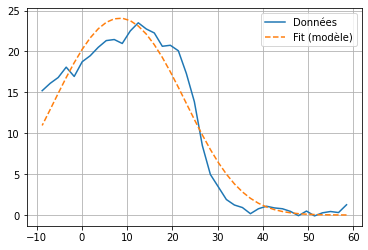

Largeur à mi-hauteur (FWHM) approximative : -30.090000000000032 , 8.363864299920609 , 9.999999999999998 , 8.363864299920609
Largeur à mi-hauteur (FWHM) approximative : 40.9703051460512


In [32]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.special import erf

# Modèle de la porte convoluée avec une gaussienne
def gaussian_convolved_rect(x, w, mu, sigma):
    return (w / 2) * (erf((x + w / 2 - mu) / (np.sqrt(2) * sigma)) - erf((x - w / 2 - mu) / (np.sqrt(2) * sigma)))

# Données simulées (par exemple)
x_data = np.linspace(-10, 10, 1000)
y_data = gaussian_convolved_rect(x_data, 5, 0, 2) + np.random.normal(0, 0.2, len(x_data))  # y = porte convoluée + bruit

Donnees = DONNEES[-2]
X, Y, label = Donnees
mask = (X < 60) * (X > -10)
x_data , y_data = X[mask], Y[mask]
# Ajustement de la fonction aux données

lower_bounds = [0, -10, 0]  # bornes inférieures
upper_bounds = [50, 30, 10]    # bornes supérieures

# Ajustement de la fonction porte convoluée avec une gaussienne aux données
popt, pcov = curve_fit(gaussian_convolved_rect, x_data, y_data, p0=[50, 18, 0.1], bounds=(lower_bounds, upper_bounds))

#popt, pcov = curve_fit(gaussian_convolved_rect, x_data, y_data, p0=[30, 20, 2])

# Paramètres ajustés : largeur de la porte, centre, écart-type de la gaussienne
w, mu, sigma = popt

# Tracer les données et le modèle ajusté
plt.plot(x_data, y_data, label='Données')
plt.plot(x_data, gaussian_convolved_rect(x_data, *popt), label='Fit (modèle)', linestyle='--')
plt.grid()
plt.legend()
plt.show()

# Calcul de la FWHM (Largeur à mi-hauteur) approximative
# Fonction convoluée à son maximum
max_value = np.max(gaussian_convolved_rect(x_data, *popt))

# Définir le seuil de mi-hauteur (50% du maximum)
half_max = max_value / 2

# Trouver les indices où la fonction dépasse le seuil
indices_above_half_max = np.where(gaussian_convolved_rect(x_data, *popt) > half_max)[0]

# Largeur approximative entre ces indices
width_at_half_max = x_data[indices_above_half_max[-1]] - x_data[indices_above_half_max[0]]

print(f"Largeur à mi-hauteur (FWHM) approximative : {width_at_half_max} , {mu} , {sigma} , {mu}")

# Calcul de la FWHM (Largeur à mi-hauteur) approximative en utilisant sigma et w
FWHM = 2 * np.sqrt(2 * np.log(2)) * np.sqrt(sigma**2 + (w / 2)**2)

print(f"Largeur à mi-hauteur (FWHM) approximative : {FWHM}")

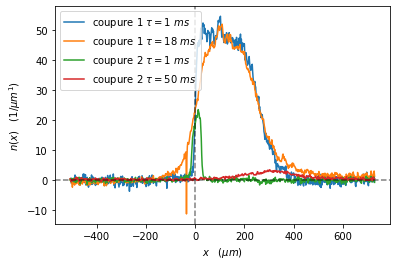

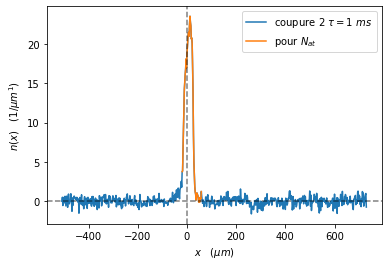

465.8508501888092


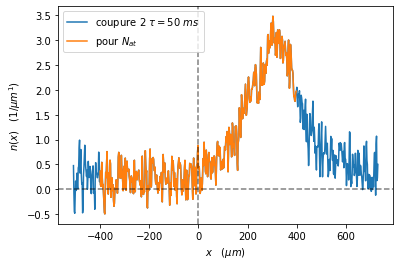

425.1935793256719
-0.08727529604520182


In [33]:

for X , Y , label in DONNEES[:] : plt.plot ( X , Y , label = label )  
plt.xlabel(r"$x \quad (\mu m)$")  # Label de l'axe des X (avec notation LaTeX)
plt.ylabel(r"$n(x) \quad (1/\mu m^1)$")  # Label de l'axe des Y (avec notation LaTeX)
plt.axvline(x=0, color='black', linestyle='--', linewidth=1.5, alpha=0.5)
plt.axhline(y=0, color='black', linestyle='--', linewidth=1.5, alpha=0.5)
#plt.title(r"$\mu = $ {0:.3f} nK, $T = $ {1:.3f} nK, $\ell = $ {2:.3f} $\mu m$".format(mu, T, Taille))
plt.legend()
plt.show()

X , Y , label = DONNEES[2]
plt.plot ( X , Y , label = label )
mask = (X > -20)*(X < 60)
plt.plot ( X[mask] , Y[mask] ,label = "pour $N_{at}$")
plt.xlabel(r"$x \quad (\mu m)$")  # Label de l'axe des X (avec notation LaTeX)
plt.ylabel(r"$n(x) \quad (1/\mu m^1)$")  # Label de l'axe des Y (avec notation LaTeX)
plt.axvline(x=0, color='black', linestyle='--', linewidth=1.5, alpha=0.5)
plt.axhline(y=0, color='black', linestyle='--', linewidth=1.5, alpha=0.5)
plt.legend()
plt.show()
Nat_0 = sum(Y[mask])
print ( Nat_0 )

X , Y , label = DONNEES[3]
plt.plot ( X , Y , label = label )
mask = (X > -400)*(X < 400)
plt.plot ( X[mask] , Y[mask] , label = "pour $N_{at}$")
plt.xlabel(r"$x \quad (\mu m)$")  # Label de l'axe des X (avec notation LaTeX)
plt.ylabel(r"$n(x) \quad (1/\mu m^1)$")  # Label de l'axe des Y (avec notation LaTeX)
plt.axvline(x=0, color='black', linestyle='--', linewidth=1.5, alpha=0.5)
plt.axhline(y=0, color='black', linestyle='--', linewidth=1.5, alpha=0.5)
plt.legend()
plt.show()
Nat_1 = sum(Y[mask])
print ( Nat_1)


print((Nat_1-Nat_0)/Nat_0)


0.0


ValueError: too many values to unpack (expected 3)

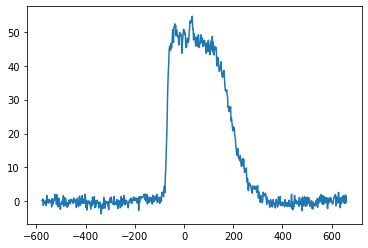

In [34]:
X , Y , label = DONNEES[0]
        #ax1.plot((X-x0)/t, Y*t/Taille, label=label + ' t : ' + str (t))
if date_donnees == '2024-02-09':x0 = 76.25 - 6.82
        #elif date_donnees == '2024-02-29':x0 = 0
else :x0 = X[np.argmax(Y)]
            
plt.plot((X-x0), Y, label=label)
print (time_list[-1] )
mu, T, Taille = triple
filename = f"{date}/density_expansion_nu_{nom}_{mup:.3f}_{T:.3f}_{Taille:.3f}_{time_list[-1]:.3f}.npz"
data_s = np.load(filename) 
x0 = data_s[0,np.argmax(data_s[1, :])]
x0=0
X_simul = data_s[0, :] - x0
Y_simul = data_s[1,:]
plt.plot(X_simul*Taille , Y_simul)
plt.xlim(-500, 250) 
plt.show()

print(filename)


# evoulition 1 bord 

Triples possibles: {(64.529, 558.939, 23.0, 20.94): [0.0, 1.0, 10.0, 11.0, 20.0, 21.0, 30.0]}
Triples possibles: {(64.529, 558.939): [0.0]}
la {(64.529, 558.939): [0.0]}  la  64.529 558.939 23.0 20.94
laaaa  [0.0]
filename = 2024-11-12/theta_discr_ih1.npz
filename = 2024-11-12/density_expansion_nu_theta_edge_1.0_ih1_64.529_558.939_0.000.npz
filename = 2024-11-12/density_expansion_nu_theta_edge_1.0_ih2_64.529_558.939_23.000_20.940_0.000.npz
filename = 2024-11-12/rho_theta_edge_1.0_discr_ih2_64.529_558.939_23.000.npz
chi2 : {(64.529, 558.939, 28.0, 19.767): 0}
Clé avec la valeur minimale: (64.529, 558.939, 28.0, 19.767)
Triples possibles: {(64.529, 558.939, 28.0, 19.767): [0.0, 1.0, 10.0, 11.0, 20.0, 21.0, 30.0]}
[1.]
1.0


/tmp/ipykernel_96542/4179647689.py:47: RuntimeWarning: divide by zero encountered in divide
  np.savez(f"PourIsa/donne.npz", [X/t , Y*t/Taille])
/tmp/ipykernel_96542/4179647689.py:48: RuntimeWarning: divide by zero encountered in divide
  np.savez(f"PourIsa/simul_mu-{mu:.3f}_T-{T:.3f}_Taille-{Taille:.3f}_.npz", [X_simul/ta*Taille , data_s[1, :]*t/Taille])


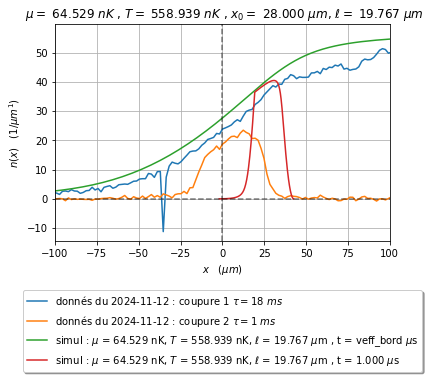

la {(64.529, 558.939): [0.0]}
laaaa aa  [0.0]
Triples possibles: {}


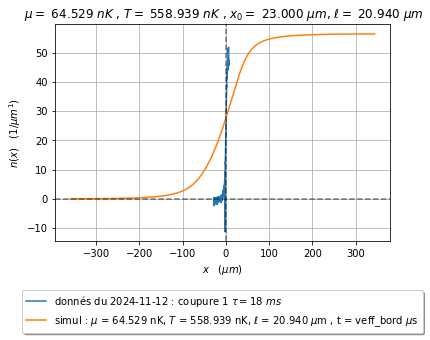

In [35]:
def plot_graph2_edge(date, nom, triple, time_list , DONNEES  , id_donnes = -1):
    mu, T, x00, Taille = triple
    # Charger les données
    index_last_underscore = nom.rfind('_')  # Trouver l'index du dernier underscore
    # Créer un graphique pour la densité multipliée par le temps en fonction de la position/temps
    
    filename = f"{date}/theta_discr_{nom[index_last_underscore+1:]}.npz"
    print ( 'filename =' ,filename )
    theta_discr = np.load(filename)
    ax1.set(xlabel="$x/\\tau\quad (\mu m / ms ) $", ylabel="$n(x)*\\tau/\ell\quad ( ms/\mu m^2 ) $", title=f" $\\mu = $ {mu:.3f} $nK$ , $T =$ {T:.3f} $nK$ , $x_0 =$ {x00:.3f} $\mu m$,  $\\ell =$ {Taille:.3f} $\mu m$")
    
    if date_donnees == '2024-02-09': t  = 50
    elif date_donnees == '2024-02-29':t = 50
    elif date_donnees == '2024-04-24':t = 30
    else : t = time_list[-1] 
    
    if DONNEES != None :
        for Donnees in [DONNEES[id_donnes]] :        
            X , Y , label = Donnees
            if date_donnees == '2024-02-09':x0 = 76.25 - 6.82
            elif date_donnees == '2024-02-29':x0 = - 6
            elif date_donnees == '2024-04-24':x0 = 0 
            else :x0 = X[np.argmax(Y)]
            X = X#-x0
            ax1.plot(X/t, Y*t/Taille, label=label)
    #print ( 'mu , T , Taille = ' , mu, T, Taille)
    #print ( 'time_list , ' , time_list)
    for t in time_list:
        filename = f"{date}/density_expansion_nu_{nom}_{mu:.3f}_{T:.3f}_{t:.3f}.npz"
        print ( 'filename =' ,filename )
        data_s = np.load(filename) 
        x0 = data_s[0,np.argmax(data_s[1, :])]
        x0 =0
        X_simul = data_s[0, :] #- x0
        #print ( data_s , data_s.size )
        #ax1.plot(X_simul/t*Taille, data_s[1, :]*t/Taille, label=f"$\\mu$ = {mu:.3f} nK, $T$ = {T:.3f} nK, $\\ell$ = {Taille:.3f} $\\mu$m , $\\tau$ = {t:.3f} $m$s")
    
    nom2 = "theta_edge_1.0_ih2"
    ta = time_list[0]
    filename = f"{date}/density_expansion_nu_{nom2}_{mu:.3f}_{T:.3f}_{x00:.3f}_{Taille:.3f}_{ta:.3f}.npz"
    print ( 'filename =' ,filename )
    data_s = np.load(filename) 
    x0 = data_s[0,np.argmax(data_s[1, :])]
    x0 =0
    X_simul = data_s[0, :] #- x0
    
    np.savez(f"PourIsa/donne.npz", [X/t , Y*t/Taille])
    np.savez(f"PourIsa/simul_mu-{mu:.3f}_T-{T:.3f}_Taille-{Taille:.3f}_.npz", [X_simul/ta*Taille , data_s[1, :]*t/Taille])
    
    index_last_underscore = nom.rfind('_')  # Trouver l'index du dernier underscore
    filename = f"{date}/rho_{nom2[:index_last_underscore]}_discr_{nom2[index_last_underscore+1:]}_{mu:.3f}_{T:.3f}_{x00:.3f}.npz"
    print ( 'filename =' ,filename )
    rho_theta_star_discr = np.load(filename) 
    theta0 = theta_discr[np.argmax(rho_theta_star_discr)]
    theta0 =  0 
    #ax1.plot(theta_discr-theta0, rho_theta_star_discr, label=f"$\\rho^\\star \\quad \\mu$ = {mu:.3f} nK, $T$ = {T:.3f} nK, $x_0$ = {x00:.3f} $\\mu$m , $\\ell$ = {Taille:.3f} $\\mu$m")
    if DONNEES != None : 
        mask = (X>-2000)*(X<2500)
        #print ( ' mask :' , mask )
        if id_donnes == -1 : return calculate_chi_square(X[mask]/t, Y[mask]*t/Taille, X_simul/t*Taille , data_s[1, :]*t/Taille)
        if id_donnes == 1 : 
            print ( id_donnes)
            return calculate_chi_square(X[mask]/t, Y[mask], X_simul, data_s[1, :])
    return 0


def plot_graph3_edge(date, nom, triple, time_list):
    index_last_underscore = nom.rfind('_')  # Trouver l'index du dernier underscore
    mu, T, x00, Taille = triple
    theta_discr = np.load(f"{date}/theta_discr_{nom[index_last_underscore+1:]}.npz")
    ax1.set(xlabel="$x \quad (\mu m)  $", ylabel="$n(x) \quad ( 1/\mu m^1 ) $", title=f" $\\mu = $ {mu:.3f} $nK$ , $T =$ {T:.3f} $nK$ , $x_0 =$ {x00:.3f} $\mu m$, $\\ell =$ {Taille:.3f} $\mu m$")
    
    
    if len(time_list) != 1 or time_list[0] != 0 : 
        for t in time_list:
            print ( t )
            if nom ==  "theta_edge_1.0_ih1":
                filename = f"{date}/density_expansion_nu_{nom}_{mu:.3f}_{T:.3f}_{t:.3f}.npz"
            elif nom ==  "theta_edge_1.0_ih2" :
                filename = f"{date}/density_expansion_nu_{nom}_{mu:.3f}_{T:.3f}_{x00:.3f}_{Taille:.3f}_{t:.3f}.npz"
            data_s = np.load(filename) 
            #x0 = data_s[0,np.argmax(data_s[1, :])]
            X_simul = data_s[0, :] #- x0
            ax1.plot(X_simul*Taille, data_s[1, :], label=f"simul : $\\mu$ = {mu:.3f} nK, $T$ = {T:.3f} nK, $\\ell$ = {Taille:.3f} $\\mu$m , t = {t:.3f} $\\mu$s")
    #deformation = (len(time_list) < 2
    else  : #deformation :
        t = "veff_bord"
        filename = f"{date}/density_expansion_nu_{nom}_{mu:.3f}_{T:.3f}_{t}.npz"
        data_s = np.load(filename) 
        #x0 = data_s[0,np.argmax(data_s[1, :])]
        X_simul = data_s[0, :] #- x0
        ax1.plot(X_simul*18, data_s[1, :], label=f"simul : $\\mu$ = {mu:.3f} nK, $T$ = {T:.3f} nK, $\\ell$ = {Taille:.3f} $\\mu$m , t = {t} $\\mu$s")

    
date = "2024-11-12"
nom = "theta_edge_1.0_ih1"

mup = None
T = 558.939#None#None
x0 = 23#None
Taille = None#22.140#22.825#27.866241455078125None

nom2 = "theta_edge_1.0_ih2"
# Extraction des triples possibles
triples2 = extract_triples(date, nom2, mup, T, x0, Taille)
print("Triples possibles:", triples2)
nom1 = "theta_edge_1.0_ih1"
triples1 = extract_triples(date, nom1, mup, T)
print("Triples possibles:", triples1)
chi2 = {} 

for triple2 , liste_t in triples2.items():
    mup2, T2, x02, Taille2 = triple2
    triples11 = extract_triples(date, nom1, mup2, T2)
    print ('la' , triples11 , ' la ' , mup2, T2, x02, Taille2)
    time_list = triples11[(mup2, T2)]
    #time_list = list(liste_t)
    print("laaaa ", time_list)
    if len(time_list) != 0 : chi2[triple] = plot_graph2_edge(date, nom1, triple2, time_list , DONNEES , 2)

print("chi2 :" ,chi2)
# Trouver la clé avec la valeur minimale
triple = min(chi2, key=chi2.get)
print("Clé avec la valeur minimale:", triple)

fig, ax1 = plt.subplots()
X , Y , label = DONNEES[1]
mask = X < 7*18
ax1.plot(X[mask], Y[mask], label=f"donnés du "+ date + ' : ' + label )
X , Y , label = DONNEES[2]
ax1.plot(X[mask], Y[mask], label=f"donnés du "+ date + ' : ' + label)
mup, T, x0, Taille = triple
triples1 = extract_triples(date, nom1, mup, T, Taille)
triple1 = (mup, T)
liste_t =  triples1[triple1]
time_list = [max(liste_t)]
time_list = list(liste_t)
plot_graph3_edge(date, nom1, triple, time_list )
    
nom = "theta_edge_1.0_ih2"
triples = extract_triples(date, nom, mup, T, x0, Taille)
print("Triples possibles:", triples)
liste_t =  triples[triple]
liste_t = np.array(liste_t)
mask = (liste_t > 0)*(liste_t < 2) 
print (liste_t[mask])
plot_graph3_edge(date, nom, triple, liste_t[mask] )
plt.axvline(x=0, color='black', linestyle='--', linewidth=1.5, alpha=0.5)
plt.axhline(y=0, color='black', linestyle='--', linewidth=1.5, alpha=0.5)
plt.xlim([-100 , 100])
plt.grid(True)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), fancybox=True, shadow=True, ncol=1)

plt.show()

nom = "theta_edge_1.0_ih1"
triples = extract_triples(date, nom, mup, T, Taille)
fig, ax1 = plt.subplots()
X , Y , label = DONNEES[1]
mask = X < 7*18
ax1.plot(X[mask]/18, Y[mask], label=f"donnés du "+ date + ' : ' + label )
X , Y , label = DONNEES[2]
#ax1.plot(X[mask]/18, Y[mask], label=f"donnés du "+ date + ' : ' + label)
for triple , liste_t in triples2.items():
    mup2, T2, x02, Taille2 = triple2
    triples11 = extract_triples(date, nom1, mup2, T2, Taille2)
    print ('la' , triples11)
    time_list = triples11[(mup2, T2)]
    #time_list = list(liste_t)
    print("laaaa aa ", time_list)
    plot_graph3_edge(date, nom1, triple, time_list )
    
nom = "theta_edge_1.0_ih2"
triples = extract_triples(date, nom, mup, T, Taille)
print("Triples possibles:", triples)
for triple , liste_t in triples.items():
    #time_list = [max(liste_t)]
    time_list = list(liste_t)
    liste_t = np.array(liste_t)
    mask = (liste_t > 0)*(liste_t < 2) 
    print (liste_t[mask])
    plot_graph3_edge(date, nom, triple, liste_t[mask] )
plt.axvline(x=0, color='black', linestyle='--', linewidth=1.5, alpha=0.5)
plt.axhline(y=0, color='black', linestyle='--', linewidth=1.5, alpha=0.5)
plt.grid(True)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), fancybox=True, shadow=True, ncol=1)

plt.show()




In [36]:
mu = None
T = 1256.101#None#None
x0 = None
Taille = None

nom = "theta_edge_1.0_ih2"
# Extraction des triples possibles
triples = extract_triples(date, nom, mu, T, x0, Taille)
print("Triples key possibles:", triples.keys())

# Accéder à la première clé du dictionnaire
first_key = list(triples.keys())[0]

# Décomposer la clé (qui est un tuple) en plusieurs variables
mu, T, x0, Taille = first_key

Triples key possibles: dict_keys([(41.652, 1256.101, 18.339, 22.176)])


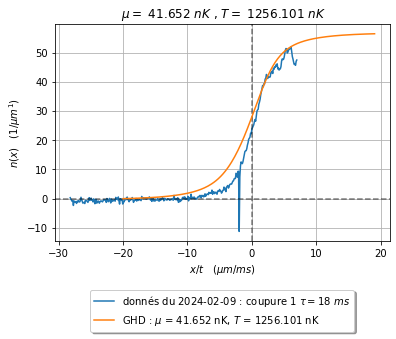

In [37]:
#Triples key possibles: #dict_keys([(64.529, 558.939, 18.339, 22.176), (64.529, 558.939, 18.339, 28.07), (64.529, 558.939, 18.339, 33.506)])
#mup, T, x0 , Taille = 64.529, 558.939,  18.339, 33.506
#triples = extract_triples(date, nom2, mup, T, x0 , Taille)

fig, ax1 = plt.subplots()
X , Y , label = DONNEES[1]
mask = X < 7*18
ax1.plot(X[mask]/18, Y[mask], label=f"donnés du "+ date_donnees + ' : ' + label )
index_last_underscore = nom.rfind('_')  # Trouver l'index du dernier underscore

theta_discr = np.load(f"{date}/theta_discr_{nom[index_last_underscore+1:]}.npz")
ax1.set(xlabel="$x/t \quad (\mu m/m s)  $", ylabel="$n(x) \quad ( 1/\mu m^1 ) $", title=f" $\\mu = $ {mu:.3f} $nK$ , $T =$ {T:.3f} $nK$ ")
plt.axvline(x=0, color='black', linestyle='--', linewidth=1.5, alpha=0.5)
plt.axhline(y=0, color='black', linestyle='--', linewidth=1.5, alpha=0.5)
t = "veff_bord"
nom = "theta_edge_1.0_ih1"
filename = f"{date}/density_expansion_nu_{nom}_{mu:.3f}_{T:.3f}_{t}.npz"
data_s = np.load(filename) 
#x0 = data_s[0,np.argmax(data_s[1, :])]
X_simul = data_s[0, :] #- x0
ax1.plot(X_simul, data_s[1, :], label=f"GHD : $\\mu$ = {mu:.3f} nK, $T$ = {T:.3f} nK")
plt.grid(True)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), fancybox=True, shadow=True, ncol=1)
plt.show()

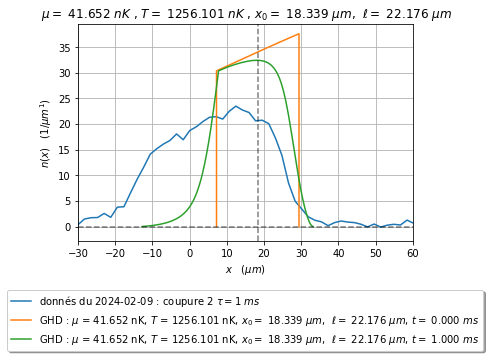

In [38]:
#mup, T, x0 , Taille = 64.529, 558.939,  18.339, 22.176#33.506
#triples = extract_triples(date, nom, mup, T, x0 ,  Taille)
fig, ax1 = plt.subplots()
X , Y , label = DONNEES[2]
mask = (X < 7*18)*(X>-5*18)
ax1.plot(X[mask], Y[mask], label=f"donnés du "+ date_donnees + ' : ' + label )
index_last_underscore = nom.rfind('_')  # Trouver l'index du dernier underscore

theta_discr = np.load(f"{date}/theta_discr_{nom[index_last_underscore+1:]}.npz")
ax1.set(xlabel="$x \quad (\mu m)  $", ylabel="$n(x) \quad ( 1/\mu m^1 ) $", title=f" $\\mu = $ {mu:.3f} $nK$ , $T =$ {T:.3f} $nK$ , $x_0 =$ {x0:.3f} $\mu m$,  $\\ell =$ {Taille:.3f} $\mu m$")

nom = "theta_edge_1.0_ih2"
for t in [0 , 1 ]:
    filename = f"{date}/density_expansion_nu_{nom}_{mu:.3f}_{T:.3f}_{x0:.3f}_{Taille:.3f}_{t:.3f}.npz"
    data_s = np.load(filename) 
    #x0 = data_s[0,np.argmax(data_s[1, :])]title=f" $\\mu = $ {mu:.3f} $nK$ , $T =$ {T:.3f} $nK$ , $x_0 =$ {x00:.3f} $\mu m$,  $\\ell =$ {Taille:.3f} $\mu m$")
    X_simul = data_s[0, :] #- x0
    ax1.plot(X_simul*Taille, data_s[1, :], label=f"GHD : $\\mu$ = {mu:.3f} nK, $T$ = {T:.3f} nK, $x_0 =$ {x0:.3f} $\mu m$,  $\\ell =$ {Taille:.3f} $\mu m$, $t =$ {t:.3f} $m s$")
plt.xlim([-30 , 60 ])
plt.axvline(x=x0, color='black', linestyle='--', linewidth=1.5, alpha=0.5)
plt.axhline(y=0, color='black', linestyle='--', linewidth=1.5, alpha=0.5)
plt.grid(True)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), fancybox=True, shadow=True, ncol=1)
plt.show()

filename = 2024-11-12/rho_theta_edge_1.0_discr_ih2_41.652_1256.101_18.339.npz
filename = 2024-11-12/rho_theta_edge_1.0_discr_moy_ih2_41.652_1256.101_18.339_22.176.npz


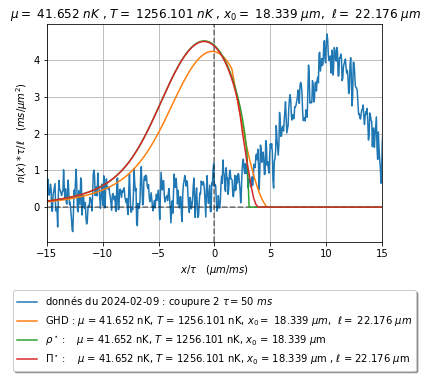

In [39]:

triples = extract_triples(date, nom, mup, T, Taille)
fig, ax1 = plt.subplots()
X , Y , label = DONNEES[-1]
mask = X < 20*30
ax1.plot(X[mask]/30, Y[mask]*30/Taille, label=f"donnés du "+ date_donnees + ' : ' + label )
index_last_underscore = nom.rfind('_')  # Trouver l'index du dernier underscore

theta_discr = np.load(f"{date}/theta_discr_{nom[index_last_underscore+1:]}.npz")
ax1.set(xlabel="$x/\\tau \quad (\mu m/m s)  $", ylabel="$n(x)*\\tau/\\ell \quad ( ms/\mu m^2 ) $", title=f" $\\mu = $ {mu:.3f} $nK$ , $T =$ {T:.3f} $nK$ , $x_0 =$ {x0:.3f} $\mu m$,  $\\ell =$ {Taille:.3f} $\mu m$")
plt.axvline(x=0, color='black', linestyle='--', linewidth=1.5, alpha=0.5)
plt.axhline(y=0, color='black', linestyle='--', linewidth=1.5, alpha=0.5)

nom = "theta_edge_1.0_ih2"
for t in [30 ]:
    filename = f"{date}/density_expansion_nu_{nom}_{mu:.3f}_{T:.3f}_{x0:.3f}_{Taille:.3f}_{t:.3f}.npz"
    data_s = np.load(filename) 
    #x0 = data_s[0,np.argmax(data_s[1, :])]title=f" $\\mu = $ {mu:.3f} $nK$ , $T =$ {T:.3f} $nK$ , $x_0 =$ {x00:.3f} $\mu m$,  $\\ell =$ {Taille:.3f} $\mu m$")
    X_simul = data_s[0, :] #- x0
    ax1.plot(X_simul/t*Taille, data_s[1, :]*t/Taille, label=f"GHD : $\\mu$ = {mu:.3f} nK, $T$ = {T:.3f} nK, $x_0 =$ {x0:.3f} $\mu m$,  $\\ell =$ {Taille:.3f} $\mu m$")

index_last_underscore = nom.rfind('_')  # Trouver l'index du dernier underscore
filename = f"{date}/rho_{nom[:index_last_underscore]}_discr_{nom[index_last_underscore+1:]}_{mu:.3f}_{T:.3f}_{x0:.3f}.npz"
print ( 'filename =' ,filename )
rho_theta_star_discr = np.load(filename)
filename = f"{date}/rho_{nom[:index_last_underscore]}_discr_moy_{nom[index_last_underscore+1:]}_{mu:.3f}_{T:.3f}_{x0:.3f}_{Taille:.3f}.npz"
print ( 'filename =' ,filename )
rho_theta_discr_moy = np.load(filename)
theta0 = theta_discr[np.argmax(rho_theta_star_discr)]
theta0 =  0 
ax1.plot(theta_discr-theta0, rho_theta_star_discr, label=f"$\\rho^\\star : \\quad \\mu$ = {mu:.3f} nK, $T$ = {T:.3f} nK, $x_0$ = {x0:.3f} $\\mu$m")
ax1.plot(theta_discr-theta0, rho_theta_discr_moy, label=f"$\\Pi^\\star : \\quad \\mu$ = {mu:.3f} nK, $T$ = {T:.3f} nK, $x_0$ = {x0:.3f} $\\mu$m , $\\ell$ = {Taille:.3f} $\\mu$m")
ax1.set_xlim(-15, 15)     
plt.grid(True)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), fancybox=True, shadow=True, ncol=1)
plt.savefig('graphique_transparent.png', transparent=True)
plt.savefig('graphique_high_res.png', dpi=300) 
plt.show()

In [40]:
mu = None
T = 558.939#None#None
x0 = 18.339#None
Taille = 22.176#None

nom = "theta_edge_1.0_ih2"
# Extraction des triples possibles
triples = extract_triples(date, nom, mu, T, x0, Taille)
print("Triples key possibles:", triples.keys())

# Accéder à la première clé du dictionnaire
first_key = list(triples.keys())[0]

# Décomposer la clé (qui est un tuple) en plusieurs variables
mu, T, x0, Taille = first_key

Triples key possibles: dict_keys([(64.529, 558.939, 18.339, 22.176)])


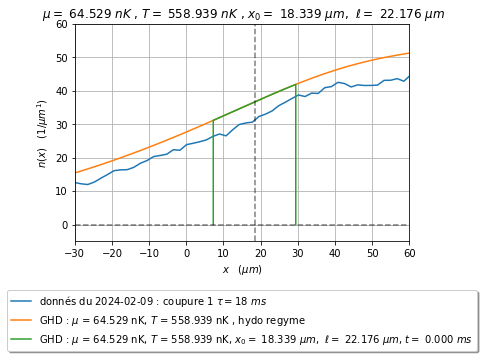

In [41]:
#Triples key possibles: #dict_keys([(64.529, 558.939, 18.339, 22.176), (64.529, 558.939, 18.339, 28.07), (64.529, 558.939, 18.339, 33.506)])
#mup, T, x0 , Taille = 64.529, 558.939,  18.339, 33.506
#triples = extract_triples(date, nom2, mup, T, x0 , Taille)

fig, ax1 = plt.subplots()
X , Y , label = DONNEES[1]
mask = X < 7*18
ax1.plot(X[mask], Y[mask], label=f"donnés du "+ date_donnees + ' : ' + label )

t = "veff_bord"
nom = "theta_edge_1.0_ih1"
filename = f"{date}/density_expansion_nu_{nom}_{mu:.3f}_{T:.3f}_{t}.npz"
data_s = np.load(filename) 
#x0 = data_s[0,np.argmax(data_s[1, :])]
X_simul = data_s[0, :] #- x0
ax1.plot(X_simul*18, data_s[1, :], label=f"GHD : $\\mu$ = {mu:.3f} nK, $T$ = {T:.3f} nK , hydo regyme")



ax1.set(xlabel="$x \quad (\mu m)  $", ylabel="$n(x) \quad ( 1/\mu m^1 ) $", title=f" $\\mu = $ {mu:.3f} $nK$ , $T =$ {T:.3f} $nK$ , $x_0 =$ {x0:.3f} $\mu m$,  $\\ell =$ {Taille:.3f} $\mu m$")

nom = "theta_edge_1.0_ih2"
for t in [0]:
    filename = f"{date}/density_expansion_nu_{nom}_{mu:.3f}_{T:.3f}_{x0:.3f}_{Taille:.3f}_{t:.3f}.npz"
    data_s = np.load(filename) 
    #x0 = data_s[0,np.argmax(data_s[1, :])]title=f" $\\mu = $ {mu:.3f} $nK$ , $T =$ {T:.3f} $nK$ , $x_0 =$ {x00:.3f} $\mu m$,  $\\ell =$ {Taille:.3f} $\mu m$")
    X_simul = data_s[0, :] #- x0
    ax1.plot(X_simul*Taille, data_s[1, :], label=f"GHD : $\\mu$ = {mu:.3f} nK, $T$ = {T:.3f} nK, $x_0 =$ {x0:.3f} $\mu m$,  $\\ell =$ {Taille:.3f} $\mu m$, $t =$ {t:.3f} $m s$")
plt.xlim([-30 , 60 ])
plt.ylim([-5 , 60 ])
plt.axvline(x=x0, color='black', linestyle='--', linewidth=1.5, alpha=0.5)
plt.axhline(y=0, color='black', linestyle='--', linewidth=1.5, alpha=0.5)
plt.grid(True)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), fancybox=True, shadow=True, ncol=1)
plt.show()

Triples key possibles: dict_keys([(41.504, 1259.101, 18.339, 22.176)])


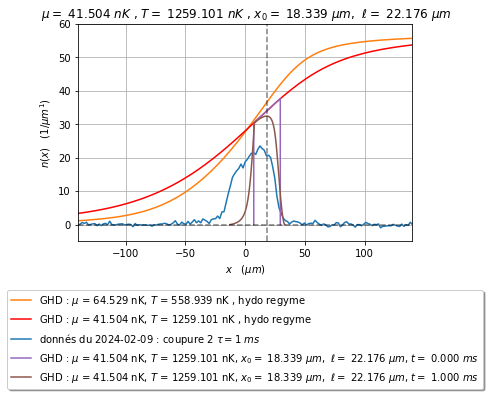

In [42]:
#Triples key possibles: #dict_keys([(64.529, 558.939, 18.339, 22.176), (64.529, 558.939, 18.339, 28.07), (64.529, 558.939, 18.339, 33.506)])
#mup, T, x0 , Taille = 64.529, 558.939,  18.339, 33.506
#triples = extract_triples(date, nom2, mup, T, x0 , Taille)

fig, ax1 = plt.subplots()

t = "veff_bord"
nom = "theta_edge_1.0_ih1"
filename = f"{date}/density_expansion_nu_{nom}_{mu:.3f}_{T:.3f}_{t}.npz"
data_s = np.load(filename) 
#x0 = data_s[0,np.argmax(data_s[1, :])]
X_simul = data_s[0, :] #- x0
ax1.plot(X_simul*18, data_s[1, :], color = '#ff7f0e', label=f"GHD : $\\mu$ = {mu:.3f} nK, $T$ = {T:.3f} nK , hydo regyme")

mu = None
T = 1259.101#None#None
x0 = None
Taille = None

nom = "theta_edge_1.0_ih2"
# Extraction des triples possibles
triples = extract_triples(date, nom, mu, T, x0, Taille)
print("Triples key possibles:", triples.keys())

# Accéder à la première clé du dictionnaire
first_key = list(triples.keys())[0]

# Décomposer la clé (qui est un tuple) en plusieurs variables
mu, T, x0, Taille = first_key

t = "veff_bord"
nom = "theta_edge_1.0_ih1"
filename = f"{date}/density_expansion_nu_{nom}_{mu:.3f}_{T:.3f}_{t}.npz"
data_s = np.load(filename) 
#x0 = data_s[0,np.argmax(data_s[1, :])]
X_simul = data_s[0, :] #- x0
ax1.plot(X_simul*18, data_s[1, :], color = 'red' , label=f"GHD : $\\mu$ = {mu:.3f} nK, $T$ = {T:.3f} nK , hydo regyme")


X , Y , label = DONNEES[2]
mask = (X < 70*18)*(X>-50*18)
ax1.plot(X[mask], Y[mask], color='#1f77b4' ,label=f"donnés du "+ date_donnees + ' : ' + label )

ax1.set(xlabel="$x \quad (\mu m)  $", ylabel="$n(x) \quad ( 1/\mu m^1 ) $", title=f" $\\mu = $ {mu:.3f} $nK$ , $T =$ {T:.3f} $nK$ , $x_0 =$ {x0:.3f} $\mu m$,  $\\ell =$ {Taille:.3f} $\mu m$")
colors = [
    #"#1f77b4",  # Bleu
    #"#ff7f0e",  # Orange
    #"#2ca02c",  # Vert
    #"#d62728",  # Rouge
    "#9467bd",  # Violet
    "#8c564b",  # Marron
    "#e377c2",  # Rose
    "#7f7f7f",  # Gris
    "#bcbd22",  # Jaune Olive
    "#17becf"   # Cyan
]
idc = 0 
nom = "theta_edge_1.0_ih2"
for t in [0,1]:
    filename = f"{date}/density_expansion_nu_{nom}_{mu:.3f}_{T:.3f}_{x0:.3f}_{Taille:.3f}_{t:.3f}.npz"
    data_s = np.load(filename) 
    #x0 = data_s[0,np.argmax(data_s[1, :])]title=f" $\\mu = $ {mu:.3f} $nK$ , $T =$ {T:.3f} $nK$ , $x_0 =$ {x00:.3f} $\mu m$,  $\\ell =$ {Taille:.3f} $\mu m$")
    X_simul = data_s[0, :] #- x0
    ax1.plot(X_simul*Taille, data_s[1, :], color = colors[idc], label=f"GHD : $\\mu$ = {mu:.3f} nK, $T$ = {T:.3f} nK, $x_0 =$ {x0:.3f} $\mu m$,  $\\ell =$ {Taille:.3f} $\mu m$, $t =$ {t:.3f} $m s$")
    idc += 1
plt.xlim([-140 , 140 ])
plt.ylim([-5 , 60 ])
plt.axvline(x=x0, color='black', linestyle='--', linewidth=1.5, alpha=0.5)
plt.axhline(y=0, color='black', linestyle='--', linewidth=1.5, alpha=0.5)
plt.grid(True)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), fancybox=True, shadow=True, ncol=1)
plt.savefig('graphique_transparent.png', transparent=True)
plt.savefig('graphique_high_res.png', dpi=300) 
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '2024-11-12/density_expansion_nu_theta_edge_1.0_ih2_41.504_1259.101_18.339_22.176_30.000.npz'

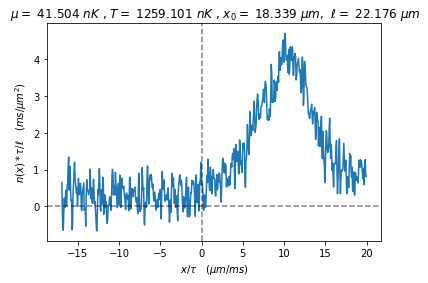

In [43]:

triples = extract_triples(date, nom, mup, T, Taille)
fig, ax1 = plt.subplots()
X , Y , label = DONNEES[-1]
mask = X < 20*30
ax1.plot(X[mask]/30, Y[mask]*30/Taille, label=f"donnés du "+ date_donnees + ' : ' + label )
index_last_underscore = nom.rfind('_')  # Trouver l'index du dernier underscore

theta_discr = np.load(f"{date}/theta_discr_{nom[index_last_underscore+1:]}.npz")
ax1.set(xlabel="$x/\\tau \quad (\mu m/m s)  $", ylabel="$n(x)*\\tau/\\ell \quad ( ms/\mu m^2 ) $", title=f" $\\mu = $ {mu:.3f} $nK$ , $T =$ {T:.3f} $nK$ , $x_0 =$ {x0:.3f} $\mu m$,  $\\ell =$ {Taille:.3f} $\mu m$")
plt.axvline(x=0, color='black', linestyle='--', linewidth=1.5, alpha=0.5)
plt.axhline(y=0, color='black', linestyle='--', linewidth=1.5, alpha=0.5)

nom = "theta_edge_1.0_ih2"
for t in [30 ]:
    filename = f"{date}/density_expansion_nu_{nom}_{mu:.3f}_{T:.3f}_{x0:.3f}_{Taille:.3f}_{t:.3f}.npz"
    data_s = np.load(filename) 
    #x0 = data_s[0,np.argmax(data_s[1, :])]title=f" $\\mu = $ {mu:.3f} $nK$ , $T =$ {T:.3f} $nK$ , $x_0 =$ {x00:.3f} $\mu m$,  $\\ell =$ {Taille:.3f} $\mu m$")
    X_simul = data_s[0, :] #- x0
    ax1.plot(X_simul/t*Taille, data_s[1, :]*t/Taille, label=f"GHD : $\\mu$ = {mu:.3f} nK, $T$ = {T:.3f} nK, $x_0 =$ {x0:.3f} $\mu m$,  $\\ell =$ {Taille:.3f} $\mu m$")

index_last_underscore = nom.rfind('_')  # Trouver l'index du dernier underscore
filename = f"{date}/rho_{nom[:index_last_underscore]}_discr_{nom[index_last_underscore+1:]}_{mu:.3f}_{T:.3f}_{x0:.3f}.npz"
print ( 'filename =' ,filename )
rho_theta_star_discr = np.load(filename)
filename = f"{date}/rho_{nom[:index_last_underscore]}_discr_moy_{nom[index_last_underscore+1:]}_{mu:.3f}_{T:.3f}_{x0:.3f}_{Taille:.3f}.npz"
print ( 'filename =' ,filename )
rho_theta_discr_moy = np.load(filename)
theta0 = theta_discr[np.argmax(rho_theta_star_discr)]
theta0 =  0 
ax1.plot(theta_discr-theta0, rho_theta_star_discr, label=f"$\\rho^\\star : \\quad \\mu$ = {mu:.3f} nK, $T$ = {T:.3f} nK, $x_0$ = {x0:.3f} $\\mu$m")
ax1.plot(theta_discr-theta0, rho_theta_discr_moy, label=f"$\\Pi^\\star : \\quad \\mu$ = {mu:.3f} nK, $T$ = {T:.3f} nK, $x_0$ = {x0:.3f} $\\mu$m , $\\ell$ = {Taille:.3f} $\\mu$m")
ax1.set_xlim(-15, 15)     
plt.grid(True)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), fancybox=True, shadow=True, ncol=1)
plt.show()

[4.72091867e+01 1.14254956e+00 4.21425394e-01 1.34317461e-02]


/tmp/ipykernel_96542/2299940493.py:32: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), fancybox=True, shadow=True, ncol=1)


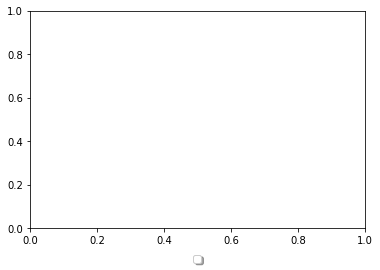

Nat : 758.2737404206489


/tmp/ipykernel_96542/2104074438.py:348: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  integral_value, _ = quad(f, np.min(x), np.max(x))


In [44]:
#donne expenssion 1ms 
X , Y , label = DONNEES[2]
mask = X < 7*18
ax1.plot(X[mask]/18, Y[mask], label=f"donnés du "+ date + ' : ' + label )
## je cherche le centre x00
x , y = X/18 , Y
def model(x , A , sigma , x0 , b ):  
    from scipy import special
    return A/2*(np.exp(-(x-x0)**2/sigma**2)) + b 

mask = (x > -100)*(x < 1400) 
eps = 1e-3
yerr = np.full (len(y[mask]) , eps ) 
ax1.plot(x[mask],y[mask] )

p0 = [ 60 , 1 , 0, 0 ]
from scipy.optimize import curve_fit

popt , pcov = curve_fit(model , x[mask] , y[mask] , sigma = yerr , p0 = np.array(p0), 
                            bounds = ([0, 0 , 0 , - 5  ],[100 , 1000 , 1000 , 5 ])
                           )

#popt = p0
print(popt)
A , sigma , x00 , b = popt 
x00 = 30/18
ax1.set_xlim(-20/18, 60/18)  # Limite de X de -20 à 60
ax1.set_ylim(-10, 40)
ax1.plot( x , model(x , *popt) , label = "fit")
ax1.axvline(x=x00, color='blue', linestyle='--', label=f'Vertical line at x={x00}')

plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), fancybox=True, shadow=True, ncol=1)
plt.show()

## nombre atome apres expenssion à 30ms Nat_donnees1
Donnees=DONNEES[-1]         
X , Y , label = Donnees
mask = (X > -400)*(X < 400)
#mask = (X > -20)*(X < 60)
Nat_donnees1 = integrale(X[mask], Y[mask])
print ( 'Nat :' , Nat_donnees1 ) 

bord_gauche :  26.61303895358253  ; bord_droite : -15.866961046417487
centre : 5.3730389535825225
Taille bord -42.48000000000002
le nombre d'atome est  1088.3812516997402


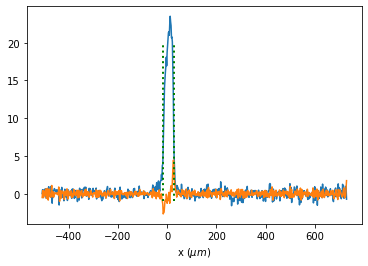

In [55]:
def taille(X,Y):
    
    bord_gauche = X[np.argmax(np.gradient(Y))]
    bord_droite = X[np.argmin(np.gradient(Y))]
    print ("bord_gauche : ", bord_gauche , ' ; bord_droite :' , bord_droite)
    
    print("centre :", (bord_gauche+bord_droite)/2)
    
    plt.plot(X,Y) 
    plt.plot(X,np.gradient(Y))
    plt.vlines(x=bord_droite, ymin=-1, ymax=20, colors='green', ls=':', lw=2)
    plt.vlines(x=bord_gauche, ymin=-1, ymax=20, colors='green', ls=':', lw=2)
    #plt.xlim([-50 , 50])
    plt.xlabel('x $(\mu m)$')
    #plt.show()
    
    Taille_exp = bord_droite - bord_gauche 
    print ("Taille bord" , Taille_exp)
    
    print("le nombre d'atome est " , np.sum(Y[Y>0])*abs(X[1]-X[0]))

X , Y , label = DONNEES[2]

taille(X,Y)

[4.72091867e+01 1.14254956e+00 4.21425394e-01 1.34317461e-02]
center : 7.585657087466846


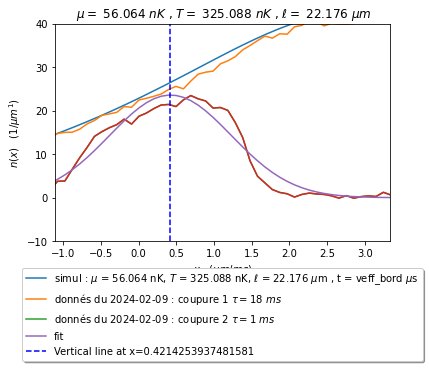

Nat : 914.1038310342449
La méthode de dichotomie échoue, car les signes de f(a) et f(b) sont identiques.
La racine estimée est : None


/tmp/ipykernel_96542/2203293745.py:348: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  integral_value, _ = quad(f, np.min(x), np.max(x))
/tmp/ipykernel_96542/2622486215.py:93: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  integral_value, _ = quad(f_interp, x00*18 - d/2, x00*18 + d/2)


TypeError: unsupported operand type(s) for /: 'NoneType' and 'int'

In [54]:
# sumulation 

nom = "theta_edge_1.0_ih1"
triple = min(chi2, key=chi2.get)
index_last_underscore = nom.rfind('_')  # Trouver l'index du dernier underscore
mu, T, x0, Taille = triple
t = "veff_bord"
filename = f"{date}/density_expansion_nu_{nom}_{mu:.3f}_{T:.3f}_{t}.npz"
data_s = np.load(filename) 
X_simul , Y_simul = data_s[0, :] ,  data_s[1, :] #- x0
fig, ax1 = plt.subplots()
ax1.set(xlabel="$x \quad (\mu m/m s)  $", ylabel="$n(x) \quad ( 1/\mu m^1 ) $", title=f" $\\mu = $ {mu:.3f} $nK$ , $T =$ {T:.3f} $nK$ , $\\ell =$ {Taille:.3f} $\mu m$")
ax1.plot(X_simul, Y_simul, label=f"simul : $\\mu$ = {mu:.3f} nK, $T$ = {T:.3f} nK, $\\ell$ = {Taille:.3f} $\\mu$m , t = {t} $\\mu$s")

# donnees bors 18 ms 
X , Y , label = DONNEES[1]
mask = X < 7*18
ax1.plot(X[mask]/18, Y[mask], label=f"donnés du "+ date + ' : ' + label )

#donne expenssion 1ms 
X , Y , label = DONNEES[2]
mask = X < 7*18
ax1.plot(X[mask]/18, Y[mask], label=f"donnés du "+ date + ' : ' + label )
## je cherche le centre x00
x , y = X/18 , Y
def model(x , A , sigma , x0 , b ):  
    from scipy import special
    return A/2*(np.exp(-(x-x0)**2/sigma**2)) + b 

mask = (x > -100)*(x < 1400) 
eps = 1e-3
yerr = np.full (len(y[mask]) , eps ) 
ax1.plot(x[mask],y[mask] )

p0 = [ 60 , 1 , 0, 0 ]
from scipy.optimize import curve_fit

popt , pcov = curve_fit(model , x[mask] , y[mask] , sigma = yerr , p0 = np.array(p0), 
                            bounds = ([0, 0 , 0 , - 5  ],[100 , 1000 , 1000 , 5 ])
                           )

#popt = p0
print(popt)
A , sigma , x00 , b = popt 
#x00 = 30/18
print( "center :" , x00*18)
ax1.set_xlim(-20/18, 60/18)  # Limite de X de -20 à 60
ax1.set_ylim(-10, 40)
ax1.plot( x , model(x , *popt) , label = "fit")
ax1.axvline(x=x00, color='blue', linestyle='--', label=f'Vertical line at x={x00}')

plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), fancybox=True, shadow=True, ncol=1)
plt.show()

## nombre atome apres expenssion à 30ms Nat_donnees1
Donnees=DONNEES[-1]         
X , Y , label = Donnees
mask = (X > -400)*(X < 400)
#mask = (X > -20)*(X < 60)
Nat_donnees1 = integrale(X[mask], Y[mask])
print ( 'Nat :' , Nat_donnees1 ) 

## determiner \ell  d 
from scipy.signal import savgol_filter
window_size = 3  # Taille de la fenêtre
poly_order = 2   # Degré du polynôme
y_smooth = savgol_filter(y, window_length=window_size, polyorder=poly_order)
f_interp = interp1d(x, np.where(y_smooth>0 , y_smooth , 0 ) , kind='linear')

def f(d):
    from scipy.signal import savgol_filter
    window_size = 1  # Taille de la fenêtre
    poly_order = 1   # Degré du polynôme
    X_simul , Y_simul
    y_smooth = Y_simul #savgol_filter(Y_simul, window_length=window_size, polyorder=poly_order)
    f_interp = interp1d(X_simul*18, y_smooth , kind='linear')
    flagu_plot = 0
    if flagu_plot :
        plt.plot(X_simul*18 , Y_simul)
        Donnees=DONNEES[-1]         
        X , Y , label = Donnees
        plt.plot(X , Y)
        plt.plot(X_simul*18 , f_interp(X_simul*18))
        plt.axvline(x=x00-d/2, color='blue', linestyle='--', linewidth=1.5, alpha=0.5)
        plt.axvline(x=x00+d/2, color='blue', linestyle='--', linewidth=1.5, alpha=0.5)
        plt.axvline(x=0, color='black', linestyle='--', linewidth=1.5, alpha=0.5)
        plt.axhline(y=0, color='black', linestyle='--', linewidth=1.5, alpha=0.5)
        
        plt.grid(True)
        plt.show()
    
    # Intégration sur un intervalle fini
    integral_value, _ = quad(f_interp, x00*18 - d/2, x00*18 + d/2)
    #print ("d : " , d , " , integral_value : ", integral_value, "integral_value - Nat_donnees1 :",integral_value - Nat_donnees1)
    
    return (integral_value - Nat_donnees1*(100-3.2931429180009575)/100)/ Nat_donnees1

def dichotomie(a, b, tol=1e-6, max_iter=100):
    # Vérifier que les signes de f(a) et f(b) sont opposés
    if f(a) * f(b) > 0:
        print("La méthode de dichotomie échoue, car les signes de f(a) et f(b) sont identiques.")
        return None
    
    # Initialisation
    iteration = 0
    while (b - a) / 2 > tol and iteration < max_iter:
        m = (a + b) / 2  # Milieu de l'intervalle
        if f(m) == 0:  # Si f(m) est suffisamment proche de zéro
            return m
        elif f(m) * f(a) < 0:  # La racine est dans [a, m]
            b = m
        else:  # La racine est dans [m, b]
            a = m
        iteration += 1
    
    # Retourner la valeur approximative de la racine
    return (a + b) / 2

# Exemple d'utilisation
a = 1
b = 30
racine = dichotomie(a, b , 1/Nat_donnees1 , 1000)
print(f"La racine estimée est : {racine}")


print ( x00 -racine/2/18 , x00+racine/2/18)
print ( x00*18)

In [384]:
print ( f(24.7) - f(racine))

print( 7.2307096175967445/18  , 32.01070961759683/18)
print( (0.4017060898664858 + 1.7783727565331573)/2)

0.26535178854396496
0.4017060898664858 1.7783727565331573
1.0900394231998216


/tmp/ipykernel_2848010/2503829708.py:90: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  integral_value, _ = quad(f_interp, x00*18 - d/2, x00*18 + d/2)
/tmp/ipykernel_2848010/2503829708.py:90: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  integral_value, _ = quad(f_interp, x00*18 - d/2, x00*18 + d/2)


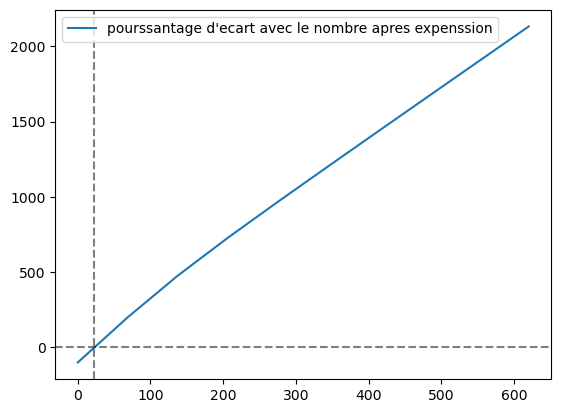

In [21]:
x = np.linspace(0, 620, 10)
plt.plot(x , (np.array([f(d) for d in x]))*100 , label = "pourssantage d'ecart avec le nombre apres expenssion")
plt.axvline(x=racine, color='black', linestyle='--', linewidth=1.5, alpha=0.5)
plt.axhline(y=0, color='black', linestyle='--', linewidth=1.5, alpha=0.5)
plt.legend()
plt.show()

filename = 2024-04-24/theta_discr_ih2.npz
filename = 2024-04-24/density_expansion_nu_theta_edge_1.0_ih2_64.554_557.000_24.780_30.000.npz
filename = 2024-04-24/density_expansion_nu_theta_edge_1.0_ih2_64.554_557.000_24.780_30.000.npz
filename = 2024-04-24/rho_theta_edge_1.0_discr_ih2_64.554_557.000.npz
filename = 2024-04-24/theta_discr_ih2.npz
filename = 2024-04-24/density_expansion_nu_theta_edge_1.0_ih2_63.810_608.954_24.780_30.000.npz
filename = 2024-04-24/density_expansion_nu_theta_edge_1.0_ih2_63.810_608.954_24.780_30.000.npz
filename = 2024-04-24/rho_theta_edge_1.0_discr_ih2_63.810_608.954.npz
filename = 2024-04-24/theta_discr_ih2.npz
filename = 2024-04-24/density_expansion_nu_theta_edge_1.0_ih2_56.869_889.057_24.780_30.000.npz
filename = 2024-04-24/density_expansion_nu_theta_edge_1.0_ih2_56.869_889.057_24.780_30.000.npz
filename = 2024-04-24/rho_theta_edge_1.0_discr_ih2_56.869_889.057.npz
filename = 2024-04-24/theta_discr_ih2.npz
filename = 2024-04-24/density_expansion_nu_theta_edg

/tmp/ipykernel_2680011/3458080931.py:209: RuntimeWarning: divide by zero encountered in divide
  chi_square = np.sum(((observed_y - interpolated_simulated_y)**2 / interpolated_simulated_y)[mask])


filename = 2024-04-24/rho_theta_edge_1.0_discr_ih2_63.811_608.947.npz
filename = 2024-04-24/theta_discr_ih2.npz
filename = 2024-04-24/density_expansion_nu_theta_edge_1.0_ih2_56.869_889.051_24.780_30.000.npz
filename = 2024-04-24/density_expansion_nu_theta_edge_1.0_ih2_56.869_889.051_24.780_30.000.npz
filename = 2024-04-24/rho_theta_edge_1.0_discr_ih2_56.869_889.051.npz
filename = 2024-04-24/theta_discr_ih2.npz
filename = 2024-04-24/density_expansion_nu_theta_edge_1.0_ih2_63.811_608.950_24.780_30.000.npz
filename = 2024-04-24/density_expansion_nu_theta_edge_1.0_ih2_63.811_608.950_24.780_30.000.npz
filename = 2024-04-24/rho_theta_edge_1.0_discr_ih2_63.811_608.950.npz
filename = 2024-04-24/theta_discr_ih2.npz
filename = 2024-04-24/density_expansion_nu_theta_edge_1.0_ih2_64.553_557.003_24.780_30.000.npz
filename = 2024-04-24/density_expansion_nu_theta_edge_1.0_ih2_64.553_557.003_24.780_30.000.npz
filename = 2024-04-24/rho_theta_edge_1.0_discr_ih2_64.553_557.003.npz
filename = 2024-04-24/th

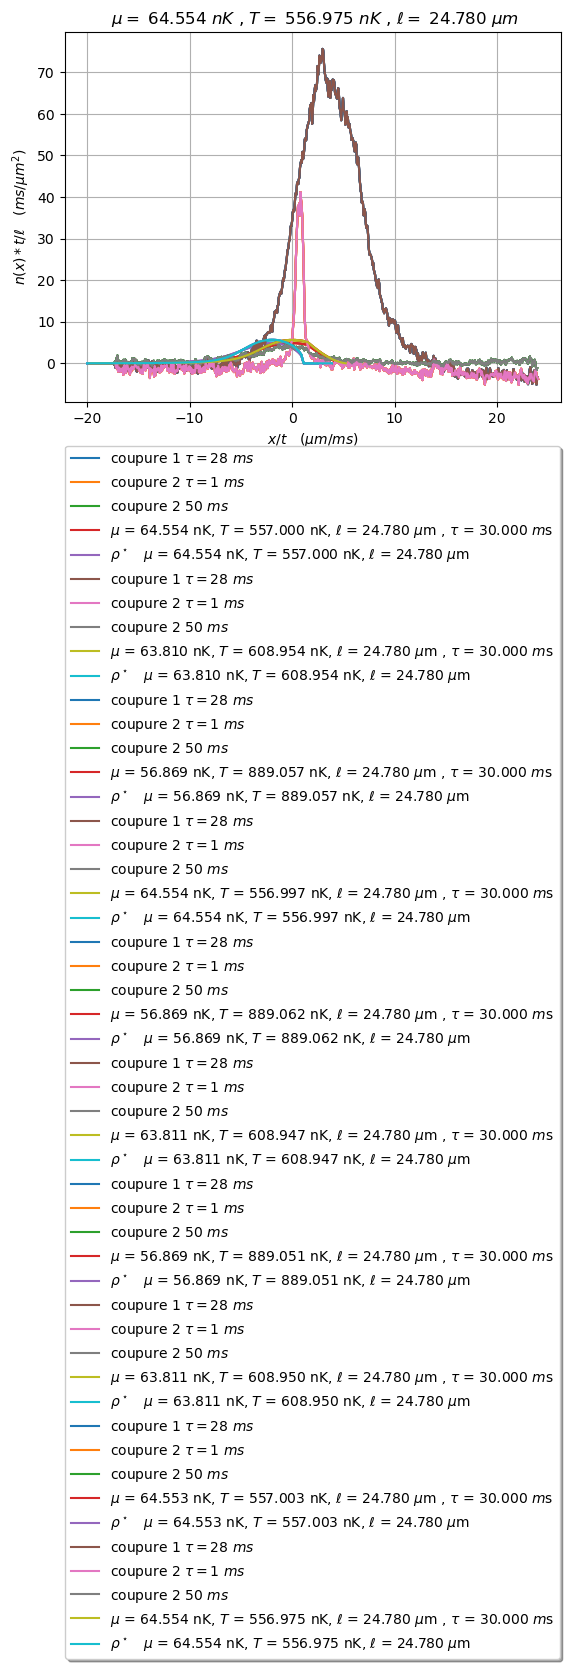

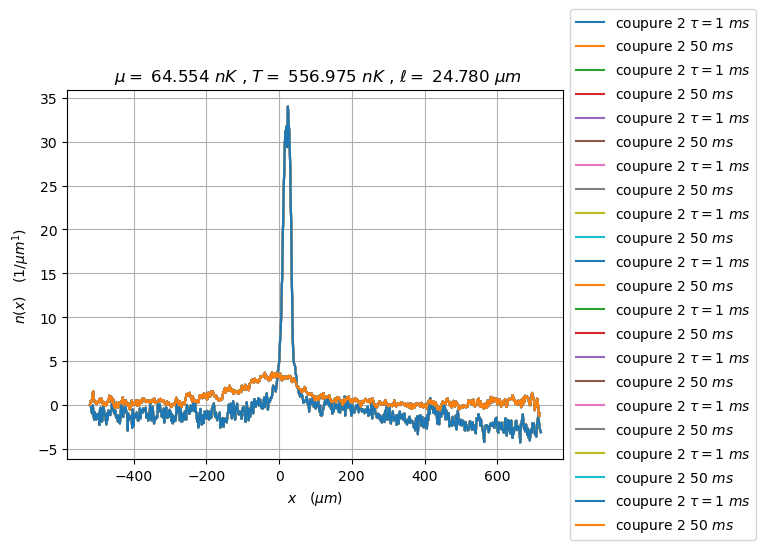

/tmp/ipykernel_2680011/3458080931.py:344: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  integral_value, _ = quad(f, np.min(x), np.max(x))
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


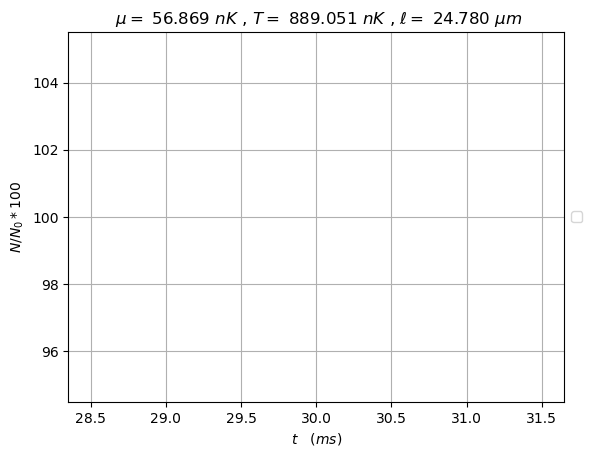

Clé avec la valeur minimale: (56.869, 889.051, 24.78)
filename = 2024-04-24/theta_discr_ih2.npz
filename = 2024-04-24/density_expansion_nu_theta_edge_1.0_ih2_56.869_889.051_24.780_30.000.npz
filename = 2024-04-24/density_expansion_nu_theta_edge_1.0_ih2_56.869_889.051_24.780_30.000.npz
filename = 2024-04-24/rho_theta_edge_1.0_discr_ih2_56.869_889.051.npz


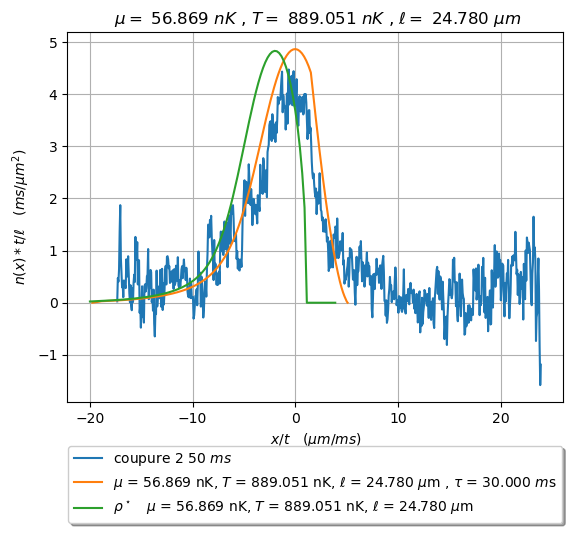

In [35]:
fig, ax1 = plt.subplots()
chi2 = {}
for triple , liste_t in triples.items():
    time_list = [max(liste_t)]
    time_list = sorted(list(liste_t))[-10:]
    mask = (np.array(list(liste_t))< 32)*(np.array(list(liste_t))> 29)
    time_list = sorted(np.array(list(liste_t))[mask])
    if len(time_list) != 0 : chi2[triple] = plot_graph2(date, nom, triple, time_list , DONNEES , 1)
plt.grid(True)
#plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))  # Placer la légende à droite du graphique
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), fancybox=True, shadow=True, ncol=1)
plt.show()

fig, ax1 = plt.subplots()
for triple , liste_t in triples.items():
    time_list = [max(liste_t)]
    time_list = sorted(list(liste_t))[-10:]
    mask = ((np.array(list(liste_t))< 32)*(np.array(list(liste_t))> 29))+(np.array(list(liste_t))==0)
    mask = (np.array(list(liste_t)) == 1) #+ (np.array(list(liste_t)) == 30)
    time_list = sorted(np.array(list(liste_t))[mask])
    plot_graph3(date, nom, triple, time_list , DONNEES)
#plt.xlim([])
plt.grid(True)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))  # Placer la légende à droite du graphique
plt.show()




# Trouver la clé avec la valeur minimale
triple = min(chi2, key=chi2.get)

#for triple , liste_t in triples.items():
for triple , liste_t in {triple : extract_t_times_Taille(date, nom, triple)}.items():
    time_list = [max(liste_t)]
    time_list = sorted(list(liste_t))[0:]
    mask = (np.array(list(liste_t))< 2000)*(np.array(list(liste_t))> 0)
    time_list = sorted(np.array(list(liste_t))[mask])
    if len(time_list) != 0 : plot_Nat(date, nom, triple, time_list , DONNEES)
        
# Afficher la clé avec la valeur minimale
print("Clé avec la valeur minimale:", triple)
fig, ax1 = plt.subplots()
liste_t = extract_t_times_Taille(date, nom, triple)
liste_t = triples[triple]
time_list = [max(liste_t)]
time_list = sorted(list(liste_t))[:]
mask = (np.array(list(liste_t))< 32)*(np.array(list(liste_t))> 29)
time_list = sorted(np.array(list(liste_t))[mask])
plot_graph2(date, nom, triple, time_list , DONNEES)
plt.grid(True)
#plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))  # Placer la légende à droite du graphique
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), fancybox=True, shadow=True, ncol=1)
plt.show()

# On compare le cas homogène et non homogène 

In [142]:


def elements_communs(dict1, dict2):
    # Créer un nouveau dictionnaire pour stocker les éléments communs
    commun_dict = {}
    
    # Parcourir les clés et les valeurs du premier dictionnaire
    for key, value in dict1.items():
        # Vérifier si la clé existe dans le deuxième dictionnaire
        if key in dict2:
            # Si la clé existe dans les deux dictionnaires, l'ajouter au dictionnaire commun
            commun_dict[key] = value & dict2[key]
    
    return commun_dict


date = "2024-02-18"
nom_h = "theta_star_1.0_h"
nom_ih = "theta_edge_1.0_ih2"

mup = None
T = 300
Taille = None

triples_h = extract_triples(date, nom_h, mup, T, Taille)
print("Triples possibles homo:", triples_h)
triples_ih = extract_triples(date, nom_ih, mup, T, Taille)
print("Triples possibles inomo:", triples_ih)
triples = elements_communs(triples_h, triples_ih)
print("Triples possibles:", triples)

for triple , liste_t in triples.items():
    
    mu, T, Taille = triple
    time_list = list(liste_t)
    time_list = sorted(time_list)
    print (time_list)
    # Charger les données
    index_last_underscore = nom.rfind('_')  # Trouver l'index du dernier underscore
    # Créer un graphique pour la densité multipliée par le temps en fonction de la position/temps
    theta_discr = np.load(f"{date}/theta_discr_{nom[index_last_underscore+1:]}.npz")
    
    #fig, ax1 = plt.subplots()
    #ax1.set(xlabel="$x/t\quad (\mu m / ms ) $", ylabel="$n(x)*t/\ell\quad ( ms/\mu m^2 ) $", title=f" $\\mu = $ {mu:.3f} $nK$ , $T =$ {T:.3f} $nK$ , $\\ell =$ {Taille:.3f} $\mu m$")
      
         
    for t in time_list:
        fig, ax1 = plt.subplots()
        ax1.set(xlabel="$x/t\quad (\mu m / ms ) $", ylabel="$n(x)*t/\ell\quad ( ms/\mu m^2 ) $", title=f" $\\mu = $ {mu:.3f} $nK$ , $T =$ {T:.3f} $nK$ , $\\ell =$ {Taille:.3f} $\mu m$")
    
        filename = f"{date}/density_expansion_nu_{nom_h}_{mu:.3f}_{T:.3f}_{Taille:.3f}_{t:.3f}.npz"
        data_h = np.load(filename) 
        x0 = data_h[0,np.argmax(data_h[1, :])]
        X_h = data_h[0, :] #- x0
        Y_h = data_h[1, :]
        filename = f"{date}/density_expansion_nu_{nom_ih}_{mu:.3f}_{T:.3f}_{Taille:.3f}_{t:.3f}.npz"
        data_ih = np.load(filename) 
        x0 = data_ih[0,np.argmax(data_ih[1, :])]
        X_ih = data_ih[0, :] #- x0
        Y_ih = data_ih[1, :]
        ax1.plot(X_h/t*Taille, Y_h*t/Taille, label=f"h $\\mu$ = {mu:.3f} nK, $T$ = {T:.3f} nK, $\\ell$ = {Taille:.3f} $\\mu$m , t = {t:.3f} $\\mu$s")
        ax1.plot(X_ih/t*Taille, Y_ih*t/Taille, label=f"inh $\\mu$ = {mu:.3f} nK, $T$ = {T:.3f} nK, $\\ell$ = {Taille:.3f} $\\mu$m , t = {t:.3f} $\\mu$s")
        plt.grid(True)
        #plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))  # Placer la légende à droite du graphique
        plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), fancybox=True, shadow=True, ncol=1)

        plt.show()
        
        fig, ax1 = plt.subplots()
        
        X , Y , label = Donnees
        #ax1.plot((X-x0)/t, Y*t/Taille, label=label + ' t : ' + str (t))
        if date_donnees == '2024-02-09':
            print ( 'yes')
            x0 = 76.25 -6.82
        else :
            x0 = X[np.argmax(Y)]
        ax1.plot((X-x0), Y, label=label)  
        
        ax1.set(xlabel="$x\quad (\mu m ) $", ylabel="$n(x)\quad ( 1/\mu m ) $", title=f" $\\mu = $ {mu:.3f} $nK$ , $T =$ {T:.3f} $nK$ , $\\ell =$ {Taille:.3f} $\mu m$")
    
        ax1.plot(X_h*Taille, Y_h,'k'  , label=f"h : $\\mu$ = {mu:.3f} nK, $T$ = {T:.3f} nK, $\\ell$ = {Taille:.3f} $\\mu$m , t = {t:.3f} $\\mu$s")
        ax1.plot(X_ih*Taille, Y_ih,'r' ,label=f"inh : $\\mu$ = {mu:.3f} nK, $T$ = {T:.3f} nK, $\\ell$ = {Taille:.3f} $\\mu$m , t = {t:.3f} $\\mu$s")
        plt.grid(True)
        #plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))  # Placer la légende à droite du graphique
        #plt.legend()  # Placer la légende à droite du graphique
        plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), fancybox=True, shadow=True, ncol=1)

        plt.show()
    
    

FileNotFoundError: [Errno 2] No such file or directory: '2024-02-18'

# avec differente temperature 

In [141]:


def elements_communs(dict1, dict2):
    # Créer un nouveau dictionnaire pour stocker les éléments communs
    commun_dict = {}
    
    # Parcourir les clés et les valeurs du premier dictionnaire
    for key, value in dict1.items():
        # Vérifier si la clé existe dans le deuxième dictionnaire
        if key in dict2:
            # Si la clé existe dans les deux dictionnaires, l'ajouter au dictionnaire commun
            commun_dict[key] = value & dict2[key]
    
    return commun_dict


date = "2024-02-18"
date = "ultime"
nom_h = "theta_star_1.0_h"
nom_ih = "theta_edge_1.0_ih2"
nom_h = nom_ih

mup = None
T = None
Taille = None

triples_h = extract_triples(date, nom_h, mup, T, Taille)
print("Triples possibles homo:", triples_h)
triples_ih = extract_triples(date, nom_ih, mup, T, Taille)
print("Triples possibles inomo:", triples_ih)
triples = elements_communs(triples_h, triples_ih)
print("Triples possibles:", triples)
fig, ax1 = plt.subplots()

X , Y , label = Donnees
#ax1.plot((X-x0)/t, Y*t/Taille, label=label + ' t : ' + str (t))
if date_donnees == '2024-02-09':
    print ( 'yes')
    x0 = 76.25 -6.82
else :
    x0 = X[np.argmax(Y)]
ax1.plot((X-x0), Y, label=label)  
for triple , liste_t in triples.items():
    
    mu, T, Taille = triple
    time_list = list(liste_t)
    time_list = [max(sorted(time_list))]
    print (time_list)
    # Charger les données
    index_last_underscore = nom.rfind('_')  # Trouver l'index du dernier underscore
    # Créer un graphique pour la densité multipliée par le temps en fonction de la position/temps
    theta_discr = np.load(f"{date}/theta_discr_{nom[index_last_underscore+1:]}.npz")
    
    #fig, ax1 = plt.subplots()
    #ax1.set(xlabel="$x/t\quad (\mu m / ms ) $", ylabel="$n(x)*t/\ell\quad ( ms/\mu m^2 ) $", title=f" $\\mu = $ {mu:.3f} $nK$ , $T =$ {T:.3f} $nK$ , $\\ell =$ {Taille:.3f} $\mu m$")
      
         
    for t in time_list:
        
        
        
        
        ax1.set(xlabel="$x\quad (\mu m ) $", ylabel="$n(x)\quad ( 1/\mu m ) $", title=f" $\\mu = $ {mu:.3f} $nK$ , $T =$ {T:.3f} $nK$ , $\\ell =$ {Taille:.3f} $\mu m$")
        
        filename = f"{date}/density_expansion_nu_{nom_h}_{mu:.3f}_{T:.3f}_{Taille:.3f}_{t:.3f}.npz"
        data_h = np.load(filename) 
        x0 = data_h[0,np.argmax(data_h[1, :])]
        X_h = data_h[0, :] #- x0
        Y_h = data_h[1, :]
        
        filename = f"{date}/density_expansion_nu_{nom_ih}_{mu:.3f}_{T:.3f}_{Taille:.3f}_{t:.3f}.npz"
        data_ih = np.load(filename) 
        x0 = data_ih[0,np.argmax(data_ih[1, :])]
        X_ih = data_ih[0, :] #- x0
        Y_ih = data_ih[1, :]
        
        ax1.plot(X_h*Taille, Y_h,'k'  , label=f"h : $\\mu$ = {mu:.3f} nK, $T$ = {T:.3f} nK, $\\ell$ = {Taille:.3f} $\\mu$m , t = {t:.3f} $\\mu$s")
        ax1.plot(X_ih*Taille, Y_ih,'r' ,label=f"inh : $\\mu$ = {mu:.3f} nK, $T$ = {T:.3f} nK, $\\ell$ = {Taille:.3f} $\\mu$m , t = {t:.3f} $\\mu$s")
plt.grid(True)
#plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))  # Placer la légende à droite du graphique
#plt.legend()  # Placer la légende à droite du graphique
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), fancybox=True, shadow=True, ncol=1)

plt.show()
    
    

Triples possibles homo: {(50.133, 266.667, 58.0): [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 20.0, 21.0, 30.0, 31.0, 40.0, 41.0, 50.0, 51.0, 100.0, 101.0, 200.0, 201.0, 300.0, 301.0], (49.082, 500.0, 58.0): [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 20.0, 21.0, 30.0, 31.0, 40.0, 41.0, 50.0], (49.422, 211.111, 58.0): [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 20.0, 21.0, 30.0, 31.0, 40.0, 41.0, 50.0, 51.0, 100.0, 101.0, 200.0, 201.0, 300.0, 301.0, 400.0, 401.0, 500.0], (47.517, 100.0, 58.0): [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 20.0, 21.0, 30.0, 31.0, 40.0, 41.0, 50.0, 51.0, 100.0, 101.0, 200.0, 201.0, 300.0, 301.0, 400.0, 401.0, 500.0], (35.317, 900.0, 58.0): [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 20.0, 21.0, 30.0, 31.0, 40.0, 41.0, 50.0], (48.462, 155.556, 58.0): [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 20.0, 21.0, 30.0, 31.0, 40.0, 41.0, 50.0, 51.0, 100.

TypeError: unsupported operand type(s) for &: 'list' and 'list'

Triples possibles homo: {(50.133, 266.667, 58.0): [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 20.0, 21.0, 30.0, 31.0, 40.0, 41.0, 50.0, 51.0, 100.0, 101.0, 200.0, 201.0, 300.0, 301.0], (49.082, 500.0, 58.0): [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 20.0, 21.0, 30.0, 31.0, 40.0, 41.0, 50.0], (49.422, 211.111, 58.0): [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 20.0, 21.0, 30.0, 31.0, 40.0, 41.0, 50.0, 51.0, 100.0, 101.0, 200.0, 201.0, 300.0, 301.0, 400.0, 401.0, 500.0], (47.517, 100.0, 58.0): [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 20.0, 21.0, 30.0, 31.0, 40.0, 41.0, 50.0, 51.0, 100.0, 101.0, 200.0, 201.0, 300.0, 301.0, 400.0, 401.0, 500.0], (35.317, 900.0, 58.0): [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 20.0, 21.0, 30.0, 31.0, 40.0, 41.0, 50.0], (48.462, 155.556, 58.0): [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 20.0, 21.0, 30.0, 31.0, 40.0, 41.0, 50.0, 51.0, 100.

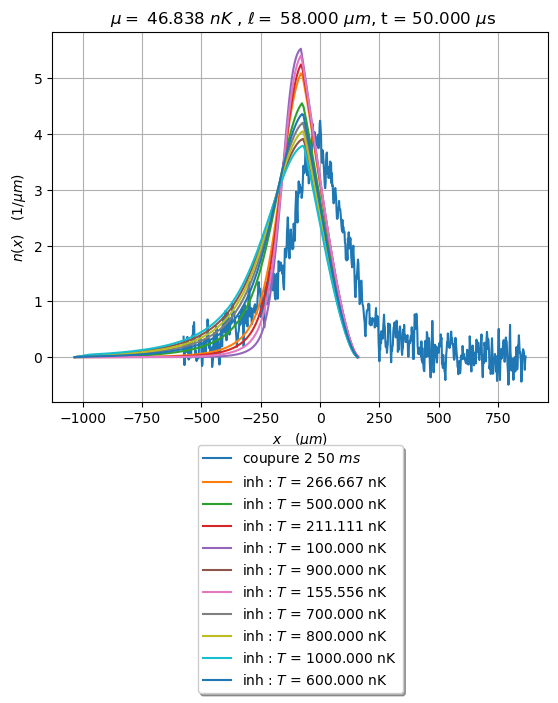

In [148]:



date = "2024-02-18"
date = 'ultime'
nom_h = "theta_star_1.0_h"
nom_ih = "theta_edge_1.0_ih2"
nom_h = nom_ih

mup = None
T = None
Taille = None

triples_ih = extract_triples(date, nom_ih, mup, T, Taille)
print("Triples possibles homo:", triples_h)
triples = triples_ih
fig, ax1 = plt.subplots()
X , Y , label = Donnees
#ax1.plot((X-x0)/t, Y*t/Taille, label=label + ' t : ' + str (t))
if date_donnees == '2024-02-09':
    print ( 'yes')
    x0 = 76.25 -6.82
else :
    x0 = X[np.argmax(Y)]
ax1.plot((X-x0), Y, label=label)  
for triple , liste_t in triples.items():
    
    mu, T, Taille = triple
    time_list = list(liste_t)
    mask = (np.array(list(liste_t))< 51)*(np.array(list(liste_t))> 49)
    time_list = sorted(np.array(list(liste_t))[mask])
    #time_list = [max(sorted(time_list))]
    print (time_list)
    # Charger les données
    index_last_underscore = nom.rfind('_')  # Trouver l'index du dernier underscore
    # Créer un graphique pour la densité multipliée par le temps en fonction de la position/temps
    theta_discr = np.load(f"{date}/theta_discr_{nom[index_last_underscore+1:]}.npz")
            
    for t in time_list:
        
        ax1.set(xlabel="$x\quad (\mu m ) $", ylabel="$n(x)\quad ( 1/\mu m ) $", title=f" $\\mu = $ {mu:.3f} $nK$ , $\\ell =$ {Taille:.3f} $\mu m$, t = {t:.3f} $\\mu$s")
        
        filename = f"{date}/density_expansion_nu_{nom_h}_{mu:.3f}_{T:.3f}_{Taille:.3f}_{t:.3f}.npz"
        data_h = np.load(filename) 
        x0 = data_h[0,np.argmax(data_h[1, :])]
        X_h = data_h[0, :] - 5/Taille 
        Y_h = data_h[1, :]
        
        filename = f"{date}/density_expansion_nu_{nom_ih}_{mu:.3f}_{T:.3f}_{Taille:.3f}_{t:.3f}.npz"
        data_ih = np.load(filename) 
        x0 = data_ih[0,np.argmax(data_ih[1, :])]
        X_ih = data_ih[0, :] - 5/Taille
        Y_ih = data_ih[1, :]
        
        homo = 1 == 0 
        if homo :
            ax1.plot(X_h*Taille, Y_h , label=f"h : $T$ = {T:.3f} nK ")
        else :
            ax1.plot(X_ih*Taille, Y_ih,label=f"inh : $T$ = {T:.3f} nK ")
plt.grid(True)
#plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))  # Placer la légende à droite du graphique
#plt.legend()  # Placer la légende à droite du graphique
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), fancybox=True, shadow=True, ncol=1)

plt.show()
    
    

In [4]:
date = "ultime"
nom_1 = "theta_edge_0.1_ih2"
nom_2 = "theta_edge_1.0_ih2"

mup = None
T = None
Taille = None

triples_1 = extract_triples(date, nom_1, mup, T, Taille)
print("Triples possibles:", triples_1)
triples_2 = extract_triples(date, nom_2, mup, T, Taille)
print("Triples possibles inomo:", triples_2)
triples = elements_communs(triples_1, triples_2)
print("Triples possibles:", triples)

for triple , liste_t in triples.items():
    
    mu, T, Taille = triple
    time_list = list(liste_t)
    time_list = sorted(time_list)
    print (time_list)
    # Charger les données
    index_last_underscore = nom.rfind('_')  # Trouver l'index du dernier underscore
    # Créer un graphique pour la densité multipliée par le temps en fonction de la position/temps
    #theta_discr = np.load(f"{date}/theta_discr_{nom_1[index_last_underscore+1:]}.npz")
    
    #fig, ax1 = plt.subplots()
    #ax1.set(xlabel="$x/t\quad (\mu m / ms ) $", ylabel="$n(x)*t/\ell\quad ( ms/\mu m^2 ) $", title=f" $\\mu = $ {mu:.3f} $nK$ , $T =$ {T:.3f} $nK$ , $\\ell =$ {Taille:.3f} $\mu m$")
    
    for t in time_list:
        fig, ax1 = plt.subplots()
        ax1.set(xlabel="$x/t\quad (\mu m / ms ) $", ylabel="$n(x)*t/\ell\quad ( ms/\mu m^2 ) $", title=f" $\\mu = $ {mu:.3f} $nK$ , $T =$ {T:.3f} $nK$ , $\\ell =$ {Taille:.3f} $\mu m$")
    
        filename = f"{date}/density_expansion_nu_{nom_1}_{mu:.3f}_{T:.3f}_{Taille:.3f}_{t:.3f}.npz"
        data_h = np.load(filename) 
        x0 = data_h[0,np.argmax(data_h[1, :])]
        X_h = data_h[0, :] #- x0
        Y_h = data_h[1, :]
        filename = f"{date}/density_expansion_nu_{nom_2}_{mu:.3f}_{T:.3f}_{Taille:.3f}_{t:.3f}.npz"
        data_ih = np.load(filename) 
        x0 = data_ih[0,np.argmax(data_ih[1, :])]
        X_ih = data_ih[0, :] #- x0
        Y_ih = data_ih[1, :]
        ax1.plot(X_h/t*Taille, Y_h*t/Taille, label=f"dt = 0.1 ms, $\\mu$ = {mu:.3f} nK, $T$ = {T:.3f} nK, $\\ell$ = {Taille:.3f} $\\mu$m , t = {t:.3f} $\\mu$s")
        ax1.plot(X_ih/t*Taille, Y_ih*t/Taille, label=f"dt = 1.0 ms, $\\mu$ = {mu:.3f} nK, $T$ = {T:.3f} nK, $\\ell$ = {Taille:.3f} $\\mu$m , t = {t:.3f} $\\mu$s")
        plt.grid(True)
        #plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))  # Placer la légende à droite du graphique
        plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), fancybox=True, shadow=True, ncol=1)

        plt.show()
        
        fig, ax1 = plt.subplots()
        ax1.set(xlabel="$x\quad (\mu m ) $", ylabel="$n(x)\quad ( 1/\mu m ) $", title=f" $\\mu = $ {mu:.3f} $nK$ , $T =$ {T:.3f} $nK$ , $\\ell =$ {Taille:.3f} $\mu m$")
    
        ax1.plot(X_h*Taille, Y_h, label=f"dt = 0.1 ms, $\\mu$ = {mu:.3f} nK, $T$ = {T:.3f} nK, $\\ell$ = {Taille:.3f} $\\mu$m , t = {t:.3f} $\\mu$s")
        ax1.plot(X_ih*Taille, Y_ih, label=f"dt = 1.0 ms, $\\mu$ = {mu:.3f} nK, $T$ = {T:.3f} nK, $\\ell$ = {Taille:.3f} $\\mu$m , t = {t:.3f} $\\mu$s")
        plt.grid(True)
        #plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))  # Placer la légende à droite du graphique
        plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), fancybox=True, shadow=True, ncol=1)

        plt.show()
        
    fig, ax1 = plt.subplots()
    ax1.set(xlabel="$x/t\quad (\mu m / ms ) $", ylabel="$n(x)*t/\ell\quad ( ms/\mu m^2 ) $", title=f" $\\mu = $ {mu:.3f} $nK$ , $T =$ {T:.3f} $nK$ , $\\ell =$ {Taille:.3f} $\mu m$")
    
    #t1 = max(list(triples_1[triple]))
    #filename = f"{date}/density_expansion_nu_{nom_1}_{mu:.3f}_{T:.3f}_{Taille:.3f}_{t1:.3f}.npz"
    #data_h = np.load(filename) 
    #x0 = data_h[0,np.argmax(data_h[1, :])]
    #X_h = data_h[0, :] #- x0
    #Y_h = data_h[1, :]
    t2 = max(list(triples_2[triple]))
    filename = f"{date}/density_expansion_nu_{nom_2}_{mu:.3f}_{T:.3f}_{Taille:.3f}_{t2:.3f}.npz"
    data_ih = np.load(filename) 
    x0 = data_ih[0,np.argmax(data_ih[1, :])]
    X_ih = data_ih[0, :] #- x0
    Y_ih = data_ih[1, :]
    ax1.plot(X_h/t*Taille, Y_h*t/Taille, label=f"dt = 0.1 ms $\\mu$ = {mu:.3f} nK, $T$ = {T:.3f} nK, $\\ell$ = {Taille:.3f} $\\mu$m , t = {t1:.3f} $\\mu$s")
    ax1.plot(X_ih/t*Taille, Y_ih*t/Taille, label=f"dt = 1.0 ms, $\\mu$ = {mu:.3f} nK, $T$ = {T:.3f} nK, $\\ell$ = {Taille:.3f} $\\mu$m , t = {t2:.3f} $\\mu$s")
    plt.grid(True)
    #plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))  # Placer la légende à droite du graphique
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), fancybox=True, shadow=True, ncol=1)

    plt.show()

    fig, ax1 = plt.subplots()
    ax1.set(xlabel="$x\quad (\mu m ) $", ylabel="$n(x)\quad ( 1/\mu m ) $", title=f" $\\mu = $ {mu:.3f} $nK$ , $T =$ {T:.3f} $nK$ , $\\ell =$ {Taille:.3f} $\mu m$")

    ax1.plot(X_h*Taille, Y_h, label=f"dt = 0.1 ms, $\\mu$ = {mu:.3f} nK, $T$ = {T:.3f} nK, $\\ell$ = {Taille:.3f} $\\mu$m , t = {t1:.3f} $\\mu$s")
    ax1.plot(X_ih*Taille, Y_ih, label=f"dt = 1.0 ms, $\\mu$ = {mu:.3f} nK, $T$ = {T:.3f} nK, $\\ell$ = {Taille:.3f} $\\mu$m , t = {t2:.3f} $\\mu$s")
    plt.grid(True)
    #plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))  # Placer la légende à droite du graphique
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), fancybox=True, shadow=True, ncol=1)

    plt.show()
        
    plot_Nat(date, nom_1, triple, sorted(list(triples_1[triple])) , DONNEES)
    plot_Nat(date, nom_2, triple, sorted(list(triples_2[triple])) , DONNEES)
    

Triples possibles: {}
Triples possibles inomo: {(36.336, 878.698, 54.0): [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 20.0, 21.0, 30.0, 31.0, 40.0, 41.0, 50.0, 51.0], (39.411, 810.429, 54.0): [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 20.0, 21.0, 30.0, 31.0, 40.0, 41.0, 50.0, 51.0], (50.133, 266.667, 58.0): [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 20.0, 21.0, 30.0, 31.0, 40.0, 41.0, 50.0, 51.0, 100.0, 101.0, 200.0, 201.0, 300.0, 301.0], (42.117, 743.784, 54.0): [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 20.0, 21.0, 30.0, 31.0, 40.0, 41.0, 50.0, 51.0], (35.317, 900.0, 54.0): [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 20.0, 21.0, 30.0, 31.0, 40.0, 41.0, 50.0, 51.0], (49.082, 500.0, 58.0): [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 20.0, 21.0, 30.0, 31.0, 40.0, 41.0, 50.0], (39.149, 816.5, 54.0): [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 20.0, 21.0, 

NameError: name 'elements_communs' is not defined

# DEFORMATION DE BORD

In [14]:
date = "test"#"PourIsa"#"ultime"
#date = "ultime"
nom = "theta_edge_1.0_ih1"

mup = 42.616
T = None
Taille = 54

triples = extract_triples(date, nom, mup, T, Taille)
#triples = {(mup,T,Taille):{1,2}}
print("Triples possibles:", triples.keys())


import os

def verifier_et_creer_repertoire(nom_repertoire):
    # Vérifier si le répertoire existe
    if not os.path.exists(nom_repertoire):
        # Créer le répertoire s'il n'existe pas
        os.makedirs(nom_repertoire)
        print(f"Le répertoire '{nom_repertoire}' a été créé avec succès.")
    else:
        print(f"Le répertoire '{nom_repertoire}' existe déjà.")


for triple , liste_t in triples.items():
    
    mu, T, Taille = triple
    time_list = list(liste_t)
    time_list = sorted(time_list)
    print (time_list)
    # Charger les données
    index_last_underscore = nom.rfind('_')  # Trouver l'index du dernier underscore
    # Créer un graphique pour la densité multipliée par le temps en fonction de la position/temps
    #theta_discr = np.load(f"{date}/theta_discr_{nom_1[index_last_underscore+1:]}.npz")
    
    #fig, ax1 = plt.subplots()
    #ax1.set(xlabel="$x/t\quad (\mu m / ms ) $", ylabel="$n(x)*t/\ell\quad ( ms/\mu m^2 ) $", title=f" $\\mu = $ {mu:.3f} $nK$ , $T =$ {T:.3f} $nK$ , $\\ell =$ {Taille:.3f} $\mu m$")
    fig, ax1 = plt.subplots()
    ax1.set(xlabel="$x/t\quad (\mu m / ms ) $", ylabel="$n(x)\quad ( 1/\mu m^1 ) $", title=f" $\\mu = $ {mu:.3f} $nK$ , $T =$ {T:.3f} $nK$ , $\\ell =$ {Taille:.3f} $\mu m$")
    
    for t in time_list[1:2]:
        
        filename = f"{date}/density_expansion_nu_{nom}_{mu:.3f}_{T:.3f}_{Taille:.3f}_{t:.3f}.npz"
        theta_discr = np.load(f"{date}/theta_discr_{nom[index_last_underscore+1:]}.npz")
        #nu_discr = np.load(f"{date}/nu_discr_{nom[index_last_underscore+1:]}_{mu:.3f}_{T:.3f}.npz")
        
        print ("filename" ,filename)        
        data = np.load(filename) 
        
        dossier_Isa = 'Andrew'
        verifier_et_creer_repertoire(dossier_Isa)
        #np.savez(f"{dossier_Isa}/density_expansion_nu_{nom}_{mu:.3f}_{T:.3f}_{Taille:.3f}_{t:.3f}.npz", [data[0,:]*Taille/t,data[1,:]])
        #np.savez(f"{dossier_Isa}/nu_{mu:.3f}_{T:.3f}.npz", [theta_discr , nu_discr])
        #print ("data" ,  data)
        
        #x0 = data[0,np.argmax(data[1, :])]
        X = data[0, :] #- x0
        Y = data[1, :]
        ax1.plot(X/t*Taille, Y, label=f"dt = 1.0 ms, $\\mu$ = {mu:.3f} nK, $T$ = {T:.3f} nK, $\\ell$ = {Taille:.3f} $\\mu$m , t = {t:.3f} $\\mu$s")
        ax1.plot(X/t*Taille, Y, label=f"dt = 1.0 ms, $\\mu$ = {mu:.3f} nK, $T$ = {T:.3f} nK, $\\ell$ = {Taille:.3f} $\\mu$m , t = {t:.3f} $\\mu$s")
    
    dossier_Isa = 'Andrew'
    verifier_et_creer_repertoire(dossier_Isa)
    
    
    theta_discr = np.load(f"{date}/theta_discr_{nom[index_last_underscore+1:]}.npz")
    nu_discr = np.load(f"{date}/nu_discr_{nom[index_last_underscore+1:]}_{mu:.3f}_{T:.3f}.npz")
    
    t = 1 
    filename = f"{date}/density_expansion_nu_{nom}_{mu:.3f}_{T:.3f}_{Taille:.3f}_{t:.3f}.npz"        
    print ("filename" ,filename)        
    data = np.load(filename) 
      
    np.savez(f"{dossier_Isa}/density_bord_{mu:.3f}_{T:.3f}.npz", [data[0,:]*Taille/t,data[1,:]])
    np.savez(f"{dossier_Isa}/nu_{mu:.3f}_{T:.3f}.npz", [theta_discr , nu_discr])
    #print ("data" ,  data)
    
    #x0 = data[0,np.argmax(data[1, :])]
    X_b = data[0, :] #- x0
    Y_b = data[1, :]
    
    ax1.plot(X_b/t*Taille, Y_b, label=f"dt = 1.0 ms, $\\mu$ = {mu:.3f} nK, $T$ = {T:.3f} nK, $\\ell$ = {Taille:.3f} $\\mu$m , t = {t:.3f} $\\mu$s")
    plt.show()
    
    
    fig, ax1 = plt.subplots()
    ax1.set(xlabel="$x/t\quad (\mu m / ms ) $", ylabel="$n(x)\quad ( 1/\mu m^1 ) $", title=f" $\\mu = $ {mu:.3f} $nK$ , $T =$ {T:.3f} $nK$ , $\\ell =$ {Taille:.3f} $\mu m$")
    ax1.plot(X_b*Taille, Y_b, label=f"dt = 1.0 ms, $\\mu$ = {mu:.3f} nK, $T$ = {T:.3f} nK, $\\ell$ = {Taille:.3f} $\\mu$m , t = {t:.3f} $\\mu$s")
  
    
    t = 0 
    nom = "theta_edge_1.0_ih2"
    filename = f"{date}/density_expansion_nu_{nom}_{mu:.3f}_{T:.3f}_{Taille:.3f}_{t:.3f}.npz"        
    print ("filename" ,filename)        
    data = np.load(filename) 
      
    np.savez(f"{dossier_Isa}/density_expansion_{mu:.3f}_{T:.3f}_{Taille:.3f}_{t:.3f}.npz", [data[0,:]*Taille,data[1,:]])
    #np.savez(f"{dossier_Isa}/nu_{mu:.3f}_{T:.3f}.npz", [theta_discr , nu_discr])
    #print ("data" ,  data)
    
    #x0 = data[0,np.argmax(data[1, :])]
    X = data[0, :] #- x0
    Y= data[1, :]
    ax1.plot(X*Taille, Y, label=f"dt = 1.0 ms, $\\mu$ = {mu:.3f} nK, $T$ = {T:.3f} nK, $\\ell$ = {Taille:.3f} $\\mu$m , t = {t:.3f} $\\mu$s")
    t = 50 
    
    
    nom = "theta_edge_1.0_ih2"
    filename = f"{date}/density_expansion_nu_{nom}_{mu:.3f}_{T:.3f}_{Taille:.3f}_{t:.3f}.npz"        
    print ("filename" ,filename)        
    data = np.load(filename) 
      
    np.savez(f"{dossier_Isa}/density_expansion_{mu:.3f}_{T:.3f}_{Taille:.3f}_{t:.3f}.npz", [data[0,:]*Taille,data[1,:]])
    X = data[0, :] #- x0
    Y= data[1, :]
    ax1.plot(X*Taille, Y, label=f"dt = 1.0 ms, $\\mu$ = {mu:.3f} nK, $T$ = {T:.3f} nK, $\\ell$ = {Taille:.3f} $\\mu$m , t = {t:.3f} $\\mu$s")
    
    
    
    plt.grid(True)
    #plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))  # Placer la légende à droite du graphique
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), fancybox=True, shadow=True, ncol=1)

    plt.show()

 
        
    #plot_Nat(date, nom, triple, sorted(list(triples[triple])) , DONNEES)


FileNotFoundError: [Errno 2] No such file or directory: 'test'

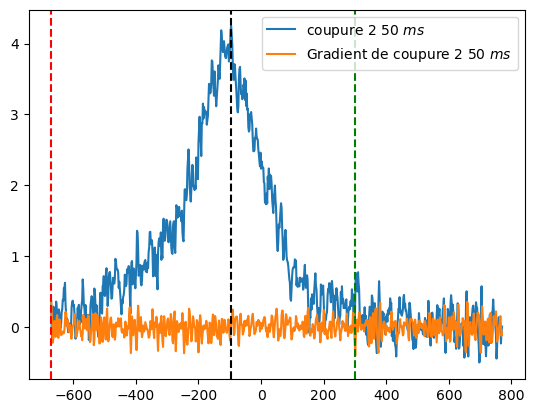

Taille bord 971.73


ValueError: cannot reshape array of size 0 into shape (0,newaxis)

In [35]:
import matplotlib.pyplot as plt
import numpy as np

X, Y, label = DONNEES[3]  # Assurez-vous que DONNEES contient les données nécessaires

plt.plot(X, Y, label=label)
plt.plot(X, np.gradient(Y), label='Gradient de ' + label)  # Ajout du label pour le gradient
plt.axvline(x=X[np.argmax(np.gradient(Y))], color='r', linestyle='--')  # Utilisation de plt.axvline pour la ligne verticale
plt.axvline(x=X[np.argmin(np.gradient(Y))], color='g', linestyle='--')  # Utilisation de plt.axvline pour la ligne verticale
plt.axvline(x=X[np.argmax(Y)], color='k', linestyle='--')  # Utilisation de plt.axvline pour la ligne verticale
plt.legend()
plt.show()

bord_gauche = X[np.argmax(np.gradient(Y))]
bord_droite = X[np.argmin(np.gradient(Y))]
Taille_exp = bord_droite - bord_gauche 
print ("Taille bord" , Taille_exp)
integrale(X[np.argmax(np.gradient(Y)) : np.argmin(np.gradient(Y))], Y[np.argmax(np.gradient(Y)) : np.argmin(np.gradient(Y))])

print ( 'nombre dat ' , sum(Y[np.argmax(np.gradient(Y)) : np.argmin(np.gradient(Y)) ]))

print ((X[np.argmax(np.gradient(Y))] + X[np.argmin(np.gradient(Y))])/2)



[-5.58742356 10.         51.32192839]


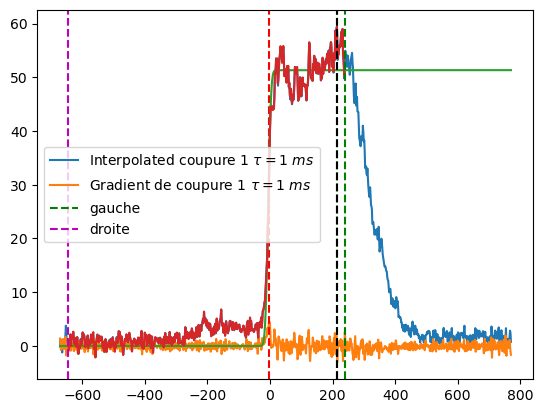

Différence entre les points d'extrémité du gradient interpolé : 216.33333333333337
-1.588888888888846


In [112]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import interp1d
from scipy import special

X, Y, label = DONNEES[0]  # Assurez-vous que DONNEES contient les données nécessaires

# Créer une fonction d'interpolation
interpolated_function = interp1d(X, Y, kind='cubic')

# Générer de nouveaux points X pour une meilleure résolution du tracé
new_X = np.linspace(min(X), max(X), 1000)

# Calculer les valeurs interpolées correspondantes
interpolated_Y = interpolated_function(new_X)

# Tracer les données interpolées
plt.plot(new_X, interpolated_Y, label='Interpolated ' + label)

# Calculer le gradient des données interpolées
gradient_Y = np.gradient(interpolated_Y)

# Tracer le gradient
plt.plot(new_X, gradient_Y, label='Gradient de ' + label)

# Trouver les points d'extrémité du gradient
max_gradient_index = np.argmax(gradient_Y)
min_gradient_index = np.argmin(gradient_Y)

# Ajouter des lignes verticales aux points d'extrémité du gradient
plt.axvline(x=new_X[max_gradient_index], color='r', linestyle='--')
plt.axvline(x=new_X[min_gradient_index], color='g', linestyle='--')

# Trouver les points d'extrémité des données originales
max_Y_index = np.argmax(Y)
min_Y_index = np.argmin(Y)

def model(x , x0 , sigma , A ): return  0.5*A*( 1 +special.erf((x-x0)/sigma))
p0 = np.array([1 ,1 ,50 ])
bounds=(-3/2*p0, 3/2*p0)
bounds=([-10 ,1 ,40 ], [10 ,10 ,100 ])
from scipy.optimize import curve_fit
g,d = 300 , 800
popt, pcov = curve_fit(model, X[g : d] , Y[g : d] ,p0 = p0 ,bounds =bounds )
print ( popt)

plt.plot(X, model(X ,*popt))
plt.plot(X[g : d], Y[g : d])
plt.axvline(x=X[g], color='g', linestyle='--' , label = 'gauche')
plt.axvline(x=X[d], color='m', linestyle='--' , label = 'droite')


# Ajouter des lignes verticales aux points d'extrémité des données originales
plt.axvline(x=X[max_Y_index], color='k', linestyle='--')

plt.legend()
plt.show()

# Calcul de la différence entre les points d'extrémité du gradient interpolé
difference = new_X[min_gradient_index] - new_X[max_gradient_index]
print("Différence entre les points d'extrémité du gradient interpolé :", difference)

print ( new_X[max_gradient_index])


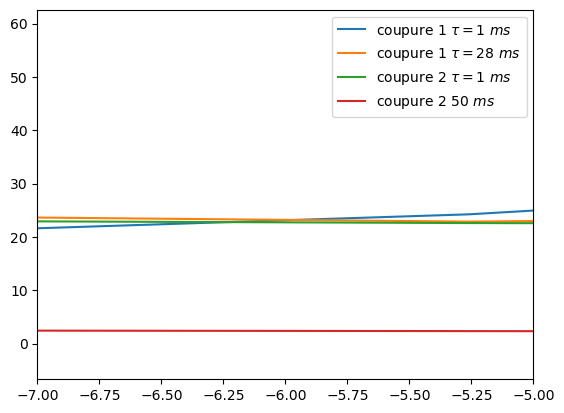

In [73]:
for X, Y, label in DONNEES:
    plt.plot(X,Y,label=label)
plt.legend()
plt.xlim([-7 ,-5])
plt.show()